 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 03 : Classification</b>

This programming assignment offers you an opportunity to implement various linear classification models. You'll begin with straightforward algorithms like Least Squares classification, LDA, and FDA. Subsequently, you'll delve into implementing the perceptron algorithm. Lastly, you'll tackle probabilistic approaches for classification. To deepen your understanding of these methods, you'll compare their performance and application scenarios critically.

<b> Instructions </b>

1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.


**Part-1) Least squares approach to classification**

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Find the decision boundary: Assign the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implement the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.

c). Evaluate the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculate the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.

d). Visualize the decision boundary: You can either display the decision hyperplane or use different colors to distinguish regions corresponding to the two classes on a 2D plane. Superimpose the test points onto the decision boundary plot.

e). Assign the value "-1" to class1 and the value "+1" to class 2. Repeat the experiments.

f). Experiment with Laplacian distribution and compare the performance of it with the Gaussian distribution experiments

g. Report your observations.


In [1]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

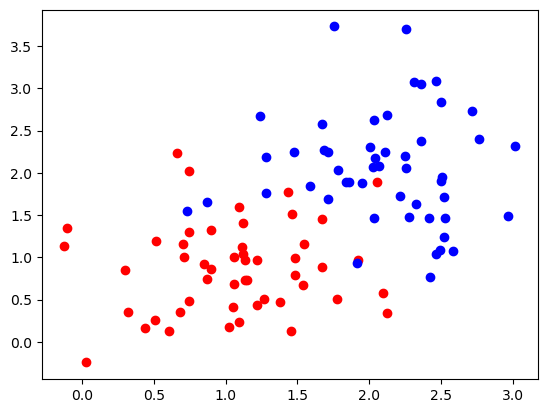

In [25]:
########################################
#Part-1)-a: Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution

class1_tr = np.random.multivariate_normal(mean1, cov, 50)
class2_tr = np.random.multivariate_normal(mean2, cov, 50)
tr_data = np.concatenate((class1_tr, class2_tr), axis=0)
tr_targets = np.concatenate((np.zeros(50), np.ones(50)))

#Generate testing data.

class1_te = np.random.multivariate_normal(mean1, cov, 200)
class2_te = np.random.multivariate_normal(mean2, cov, 200)
te_data = np.concatenate((class1_te, class2_te), axis=0)
te_targets = np.concatenate((np.zeros(200), np.ones(200)))

plt.scatter(class1_tr[:,0], class1_tr[:,1], color='r', label='Class 1')
plt.scatter(class2_tr[:,0], class2_tr[:,1], color='b', label='Class 2')

In [3]:
########################################
#Part-1)-b: Find the decision boundary
########################################
#Complete the below function
def LS_Classify(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Testing labels

    # Add a column of ones to the training data and testing data

    X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
    X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

    #Impliment pseudo inverse solution to get the weight vector

    w = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ Y_train

    #Predict the lables of test data using the pseudo inverse solution

    predictions = X_test @ w

    #Return the predicted test labels

    return predictions

#Get the test data predictions
predictions = LS_Classify(tr_data, tr_targets, te_data)

In [26]:
##########################################
#Part-1)-c: Evaluate the quality of decision boundary
##########################################
#Complete the below function
def LS_Classify_Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth test labels and predicted test labels
    #Outputs: Accuracy

    #Compute the accuracy

    accuracy = np.mean(Y_test == np.round(Y_pred))

    #Return the accuracy
    return accuracy

accuracy = LS_Classify_Accuracy(te_targets, predictions)
print("Accuracy: ", accuracy)

Accuracy:  0.885


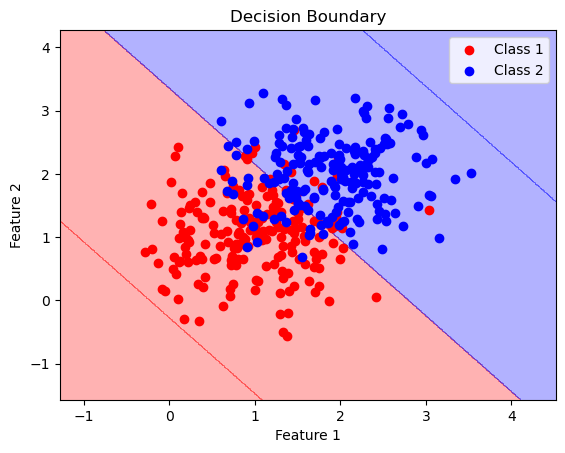

In [27]:
##########################################
#Part-1)-d: Visualize the decision boundary
##########################################

# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].

#Get the min and max values of the features
x_min, x_max = te_data[:, 0].min() - 1, te_data[:, 0].max() + 1
y_min, y_max = te_data[:, 1].min() - 1, te_data[:, 1].max() + 1

#Create the mesh grid

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#Predict the labels of the mesh grid points

Z = LS_Classify(tr_data, tr_targets, np.c_[xx.ravel(), yy.ravel()])
Z = np.round(Z)
Z = Z.reshape(xx.shape)

#Plot the contour of the decision boundary

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_te[:,0], class1_te[:,1], color='r', label='Class 1')
plt.scatter(class2_te[:,0], class2_te[:,1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [28]:
##########################################
#Part-1)-e: Change the target label notation, and repeat the experiments
##########################################

tr_targets_n = 2*tr_targets - 1
te_targets_n = 2*te_targets - 1

#Get the test data predictions

predictions_n = LS_Classify(tr_data, tr_targets_n, te_data)

#Compute the accuracy
def LS_Classify_Accuracy_n(Y_test, Y_pred):
    accuracy = np.mean(Y_test == np.sign(Y_pred))
    return accuracy

accuracy_n = LS_Classify_Accuracy_n(te_targets_n, predictions_n)
print("Accuracy: ", accuracy_n)


Accuracy:  0.8675


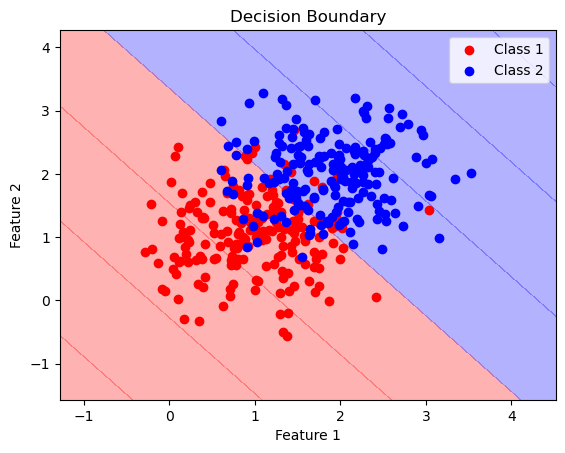

In [29]:
# plot the decision boundary

#Get the min and max values of the features
x_min, x_max = te_data[:, 0].min() - 1, te_data[:, 0].max() + 1
y_min, y_max = te_data[:, 1].min() - 1, te_data[:, 1].max() + 1

#Create the mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#Predict the labels of the mesh grid points
Z = LS_Classify(tr_data, tr_targets, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Plot the contour of the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_te[:,0], class1_te[:,1], color='r', label='Class 1')
plt.scatter(class2_te[:,0], class2_te[:,1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

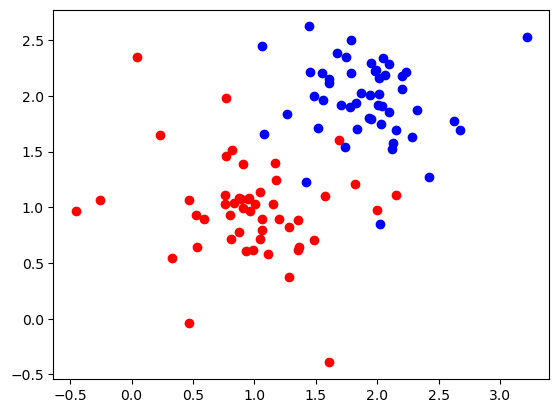

In [11]:
##########################################
#Part-1)-f: Repeat the experiments with Laplacial distribution
##########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
b = 0.3                 #Scale parameter of Laplacian distribution

# Get the training data

class1_tr = np.random.laplace(mean1, b, (50, 2))
class2_tr = np.random.laplace(mean2, b, (50, 2))
tr_data = np.concatenate((class1_tr, class2_tr), axis=0)

# Get the testing data

class1_te = np.random.laplace(mean1, b, (200, 2))
class2_te = np.random.laplace(mean2, b, (200, 2))
te_data = np.concatenate((class1_te, class2_te), axis=0)

plt.scatter(class1_tr[:,0], class1_tr[:,1], color='r', label='Class 1')
plt.scatter(class2_tr[:,0], class2_tr[:,1], color='b', label='Class 2')
plt.show()

In [12]:
# Get the test data predictions
predictions = LS_Classify(tr_data, tr_targets, te_data)

#Compute the accuracy
def LS_Classify_Accuracy(Y_test, Y_pred):
    accuracy = np.mean(Y_test == np.round(Y_pred))
    return accuracy

accuracy = LS_Classify_Accuracy(te_targets, predictions)
print("Accuracy: ", accuracy)

Accuracy:  0.945


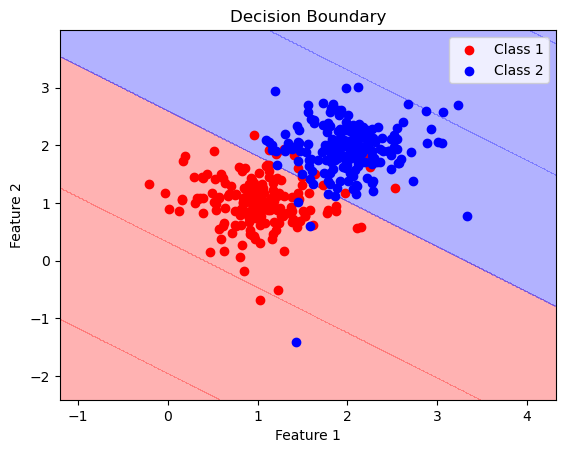

In [14]:
# Decision boundary

#Get the min and max values of the features
x_min, x_max = te_data[:, 0].min() - 1, te_data[:, 0].max() + 1
y_min, y_max = te_data[:, 1].min() - 1, te_data[:, 1].max() + 1

#Create the mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#Predict the labels of the mesh grid points
Z = LS_Classify(tr_data, tr_targets, np.c_[xx.ravel(), yy.ravel()])
Z = np.round(Z)
Z = Z.reshape(xx.shape)

#Plot the contour of the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_te[:,0], class1_te[:,1], color='r', label='Class 1')
plt.scatter(class2_te[:,0], class2_te[:,1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

<b> Report your observations </b>

1. Accuracy obtained for dataset with classes {0,1} is the same as the accuracy obtained for dataset with classes {-1,1}. This is because the change of class is only a linear change of units and it does not affect the decision boundary.

2. Since the mixing of data points is not very high, the decision boundary obtained using the pseudo-inverse solution is able to classify the test data with good accuracy.

3. The decision boundary is a linear hyperplane that separates the two classes.


<b> Part - (2) : Linear & Fisher Discriminant analysis : </b> In this segment of the programming task, you'll learn the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Develop a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Create a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

d). Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension.

e). Report your observations.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

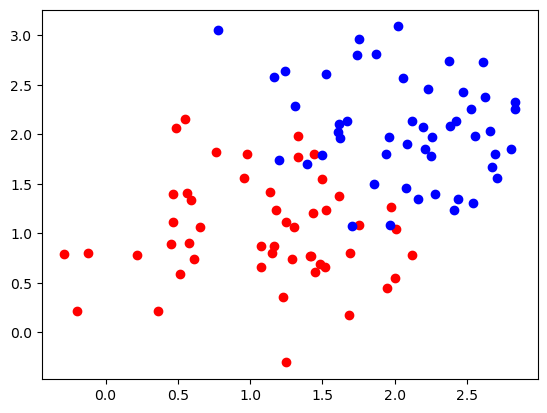

In [31]:
########################################
#Part-2)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)
class2_tr = np.random.multivariate_normal(mean2, cov, 50)
tr_data = np.concatenate((class1_tr, class2_tr), axis=0)
tr_targets = np.concatenate((np.zeros(50), np.ones(50)))

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)
class2_te = np.random.multivariate_normal(mean2, cov, 200)
te_data = np.concatenate((class1_te, class2_te), axis=0)
te_targets = np.concatenate((np.zeros(200), np.ones(200)))

plt.scatter(class1_tr[:,0], class1_tr[:,1], color='r', label='Class 1')
plt.scatter(class2_tr[:,0], class2_tr[:,1], color='b', label='Class 2')
plt.show()

In [32]:
########################################
#Part-2)-(b)
########################################
#Complete the below function
def LDA_classify(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Between class covariance

  #Compute the weight vector

  w = (np.mean(X_train[Y_train==1], axis=0) - np.mean(X_train[Y_train==0], axis=0))
  w = w / np.linalg.norm(w)

  #Compute the threshold

  threshold = (np.mean(X_train[Y_train==1], axis=0) + np.mean(X_train[Y_train==0], axis=0)) @ w / 2

  #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision

  predictions = (X_test @ w > threshold).astype(int)

  #Return weight vector and the predictions on testing data

  return predictions, w

predictions, w = LDA_classify(tr_data, tr_targets, te_data)

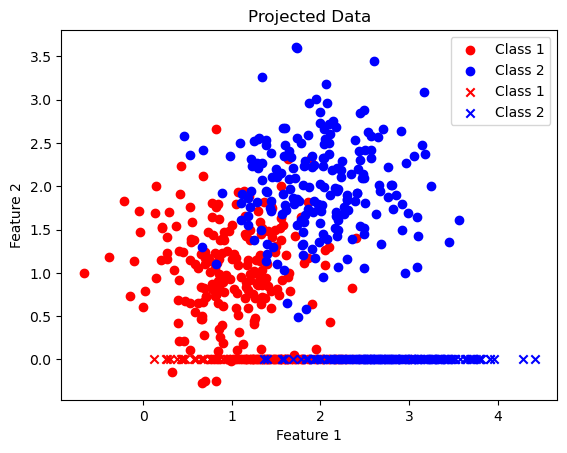

Accuracy with LDA: 88.5


In [33]:
def LDA_project(w, X_test, Y_test):
    #Inputs: weight vector, testing data, and testing labels

    #Project the test data onto 1-dimensional space

    proj = X_test @ w

    # plot the original data
    plt.scatter(X_test[Y_test==0][:,0], X_test[Y_test==0][:,1], color='r', label='Class 1')
    plt.scatter(X_test[Y_test==1][:,0], X_test[Y_test==1][:,1], color='b', label='Class 2')
    # plot the projected data along the w vector
    plt.scatter(proj[Y_test==0], np.zeros(np.sum(Y_test==0)), color='r', label='Class 1', marker='x')
    plt.scatter(proj[Y_test==1], np.zeros(np.sum(Y_test==1)), color='b', label='Class 2', marker='x')
    plt.title('Projected Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


LDA_project(w, te_data, te_targets)

#Compute and print the accuracy
def LDA_Accuracy(Y_test, Y_pred):
  accuracy = np.mean(Y_test == Y_pred)
  return accuracy

accuracy = LDA_Accuracy(te_targets, predictions)
print('Accuracy with LDA:', accuracy*100)

In [34]:
########################################
#Part-2)-(c)
########################################
def FDA_classify(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Weight vector and predictions

    #Compute the weight vector

    m0 = np.mean(X_train[Y_train==0], axis=0)
    m1 = np.mean(X_train[Y_train==1], axis=0)
    Sw = (X_train[Y_train==0] - m0).T @ (X_train[Y_train==0] - m0) + (X_train[Y_train==1] - m1).T @ (X_train[Y_train==1] - m1)

    w = np.linalg.pinv(Sw) @ (np.mean(X_train[Y_train==1], axis=0) - np.mean(X_train[Y_train==0], axis=0))
    w = w / np.linalg.norm(w)

    #Compute the threshold

    threshold = (np.mean(X_train[Y_train==1], axis=0) + np.mean(X_train[Y_train==0], axis=0)) @ w / 2

    #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision

    predictions = (X_test @ w > threshold).astype(int)

    #Return weight vector and the predictions on testing data

    return w, predictions

w, predictions = FDA_classify(tr_data, tr_targets, te_data)

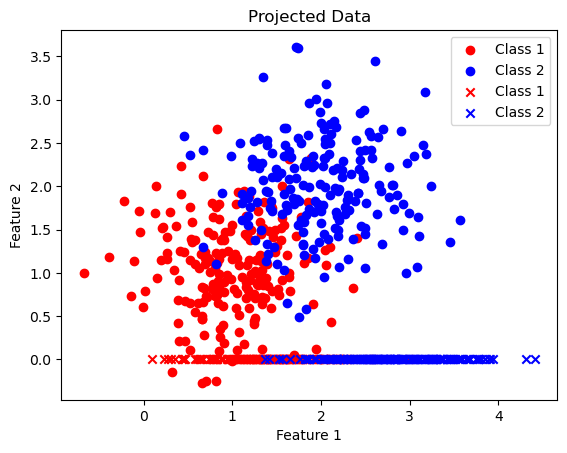

Accuracy with FDA: 89.0


In [35]:
def FDA_project(w, X_test, Y_test):
    #Inputs: weight vector, testing data, and testing labels

    #Project the test data onto 1-dimensional space

    proj = X_test @ w

    #Plot the projections
    plt.scatter(X_test[Y_test==0][:,0], X_test[Y_test==0][:,1], color='r', label='Class 1')
    plt.scatter(X_test[Y_test==1][:,0], X_test[Y_test==1][:,1], color='b', label='Class 2')
    plt.scatter(proj[Y_test==0], np.zeros(np.sum(Y_test==0)), color='r', label='Class 1', marker='x')
    plt.scatter(proj[Y_test==1], np.zeros(np.sum(Y_test==1)), color='b', label='Class 2', marker='x')
    plt.title('Projected Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


FDA_project(w, te_data, te_targets)

#Compute and print the accuracy

def FDA_Accuracy(Y_test, Y_pred):
    accuracy = np.mean(Y_test == Y_pred)
    return accuracy

accuracy = FDA_Accuracy(te_targets, predictions)
print('Accuracy with FDA:', accuracy*100)

In [21]:
########################################
#Part-2)-(d)
########################################

# Data generation
mean1 = [1,1,1,1]           #Mean of class1
mean2 = [2,2,2,2]           #Mean of class2
mean3 = [3,3,3,3]           #Mean of class3
mean4 = [4,4,4,4]           #Mean of class4
cov = [[0.3,0,0,0],[0,0.3,0,0],[0,0,0.3,0],[0,0,0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data.
class1_tr = np.random.multivariate_normal(mean1, cov, 50)
class2_tr = np.random.multivariate_normal(mean2, cov, 50)
class3_tr = np.random.multivariate_normal(mean3, cov, 50)
class4_tr = np.random.multivariate_normal(mean4, cov, 50)
tr_data = np.concatenate((class1_tr, class2_tr, class3_tr, class4_tr), axis=0)
tr_targets = np.concatenate((np.zeros(50), np.ones(50), 2*np.ones(50), 3*np.ones(50)))

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)
class2_te = np.random.multivariate_normal(mean2, cov, 200)
class3_te = np.random.multivariate_normal(mean3, cov, 200)
class4_te = np.random.multivariate_normal(mean4, cov, 200)
te_data = np.concatenate((class1_te, class2_te, class3_te, class4_te), axis=0)
te_targets = np.concatenate((np.zeros(200), np.ones(200), 2*np.ones(200), 3*np.ones(200)))

In [22]:
def FDA_project_K(X_train, Y_train, X_test, k):
    #Inputs: Training data, Training label, Testing data, and the number of eigen vectors to be considered
    #Oupur: Projection matrix

    Sw = 0
    for i in range(4):
        mi = np.mean(X_train[Y_train==i], axis=0)
        Sw += (X_train[Y_train==i] - mi).T @ (X_train[Y_train==i] - mi)
    
    mt = np.mean(X_train, axis=0)
    St = (X_train - mt).T @ (X_train - mt)

    Sb = St - Sw

    #Compute the eigen vectors and eigen values of the matrix inv(Sw)Sb
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(Sw) @ Sb)

    #Sort the eigen vectors based on the eigen values
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

    #Take the first k eigen vectors
    w = np.array([eig_pairs[i][1] for i in range(k)]).T

    #Compute and return the projection matrix
    return w

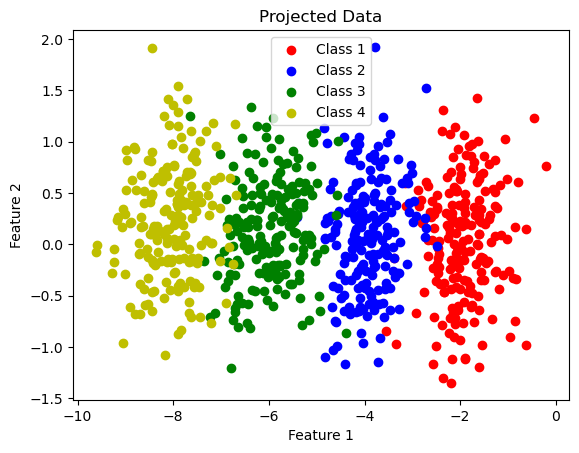

In [23]:
w = FDA_project_K(tr_data, tr_targets, te_data, 2)

#Project the test data onto 2-dimensional space
proj = te_data @ w

#Plot the projections
plt.scatter(proj[te_targets==0][:,0], proj[te_targets==0][:,1], color='r', label='Class 1')
plt.scatter(proj[te_targets==1][:,0], proj[te_targets==1][:,1], color='b', label='Class 2')
plt.scatter(proj[te_targets==2][:,0], proj[te_targets==2][:,1], color='g', label='Class 3')
plt.scatter(proj[te_targets==3][:,0], proj[te_targets==3][:,1], color='y', label='Class 4')
plt.title('Projected Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

<b> Report your observations </b>

1. The projection using FDA is better than the projection using LDA. This is because FDA considers both between-class and within-class covariance, whereas LDA only considers between-class covariance.


<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.

e). Report your observations


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

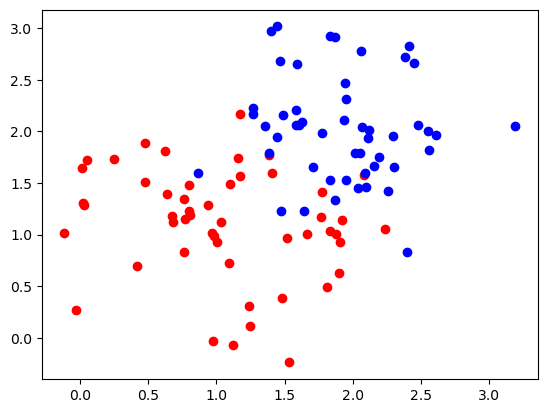

In [36]:
########################################
#Part-3)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)
class2_tr = np.random.multivariate_normal(mean2, cov, 50)
tr_data = np.concatenate((class1_tr, class2_tr), axis=0)
tr_targets = np.concatenate((np.zeros(50), np.ones(50)))
tr_targets = 2*tr_targets - 1

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)
class2_te = np.random.multivariate_normal(mean2, cov, 200)
te_data = np.concatenate((class1_te, class2_te), axis=0)
te_targets = np.concatenate((np.zeros(200), np.ones(200)))
te_targets = 2*te_targets - 1

plt.scatter(class1_tr[:,0], class1_tr[:,1], color='r', label='Class 1')
plt.scatter(class2_tr[:,0], class2_tr[:,1], color='b', label='Class 2')
plt.show()

In [37]:
########################################
#Part-3)-(b)
########################################
def Perceptron(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, Testing data
    #Outputs: Testing data predictions, Weight vector representing the decision boundary

    epochs = 1000     #Number of epochs
    X = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1) #Data. Append ones to the training data to take care of the bias
    w = np.random.rand(X.shape[1]) #Initialize the weight vector
    for epoch in range(0,epochs,1):
        #Compute the predictions
        predictions = X @ w
        predictions = np.sign(predictions)

        #Compute the error
        error = np.zeros(X.shape[1])
        for i in range(X.shape[0]):
            if Y_train[i] * predictions[i] <= 0:
                error = error + Y_train[i] * X[i]

        #Update the weight vector
        w = w + 0.01 * error

    #Compute the test data predicitions using the final weight vector

    X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
    predictions = X_test @ w

    #Return the test data predictions and the final weight vector
    return predictions, w

In [38]:
predictions, w = Perceptron(tr_data, tr_targets, te_data)

#Compute the accuracy

def Perceptron_Accuracy(Y_test, Y_pred):
    accuracy = np.mean(Y_test == np.sign(Y_pred))
    return accuracy

accuracy = Perceptron_Accuracy(te_targets, predictions)
print('Accuracy with Perceptron:', accuracy*100)

Accuracy with Perceptron: 93.25


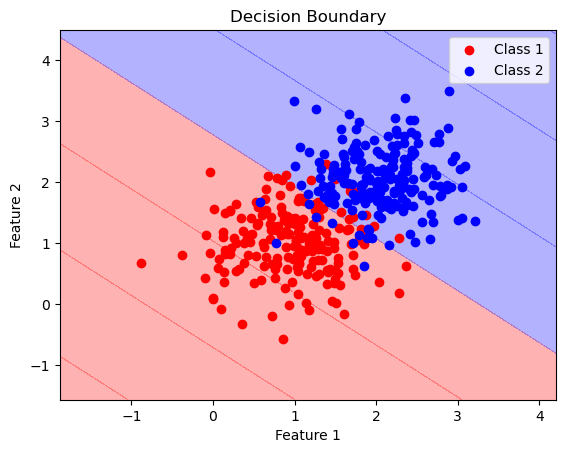

In [39]:
##########################################
#Plot the decision boundary using perceptron
##########################################

#Get the min and max values of the features
x_min, x_max = te_data[:, 0].min() - 1, te_data[:, 0].max() + 1
y_min, y_max = te_data[:, 1].min() - 1, te_data[:, 1].max() + 1

#Create the mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#Predict the labels of the mesh grid points
Z = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()] @ w
Z = Z.reshape(xx.shape)

#Plot the contour of the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_te[:,0], class1_te[:,1], color='r', label='Class 1')
plt.scatter(class2_te[:,0], class2_te[:,1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

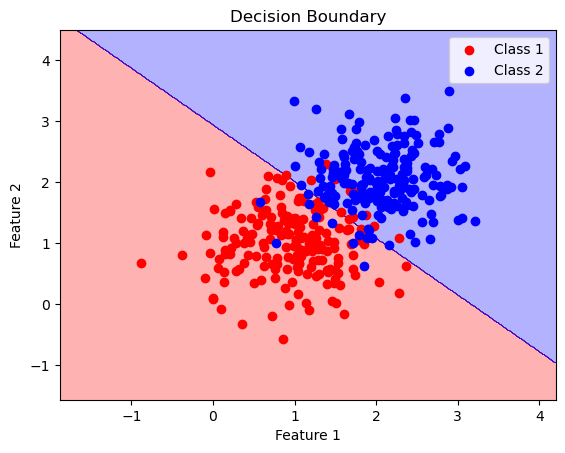

In [41]:
##########################################
#Plot the decision boundary using least squares
##########################################

#Get the min and max values of the features
x_min, x_max = te_data[:, 0].min() - 1, te_data[:, 0].max() + 1
y_min, y_max = te_data[:, 1].min() - 1, te_data[:, 1].max() + 1

#Create the mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#Predict the labels of the mesh grid points
Z = LS_Classify(tr_data, tr_targets, np.c_[xx.ravel(), yy.ravel()])
Z = np.sign(Z)
Z = Z.reshape(xx.shape)

#Plot the contour of the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_te[:,0], class1_te[:,1], color='r', label='Class 1')
plt.scatter(class2_te[:,0], class2_te[:,1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

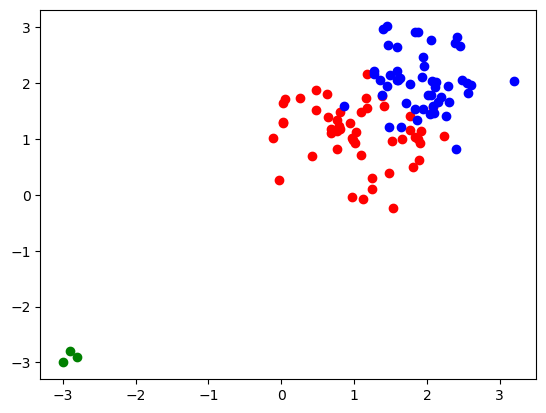

In [42]:
##########################################
#Part-3)-(c): Repeat the experiments with the true outliers added to the data. Compare and contrast the perceptron algorithm with least squares method
##########################################

#Add the outliers to the training data
outliers = np.array([[-3,-3], [-2.8,-2.9], [-2.9,-2.8]])
tr_data = np.concatenate((tr_data, outliers), axis=0)
tr_targets = np.concatenate((tr_targets, np.ones(3)))

plt.scatter(class1_tr[:,0], class1_tr[:,1], color='r', label='Class 1')
plt.scatter(class2_tr[:,0], class2_tr[:,1], color='b', label='Class 2')
plt.scatter(outliers[:,0], outliers[:,1], color='g', label='Outliers')
plt.show()


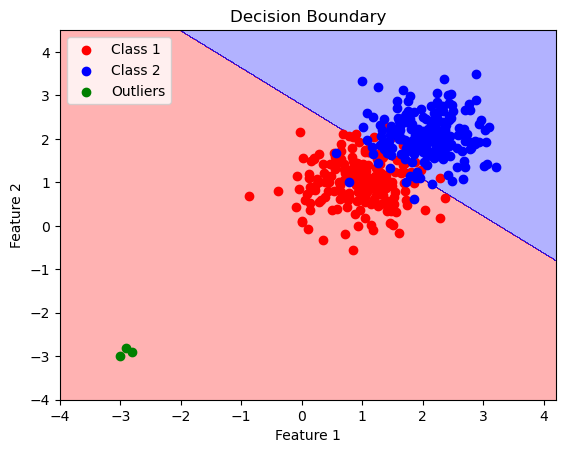

In [43]:
# Decision boundary using perceptron

#Get the min and max values of the features
x_min, x_max = te_data[:, 0].min() - 1, te_data[:, 0].max() + 1
x_min = min(x_min, outliers[:,0].min() - 1)
y_min, y_max = te_data[:, 1].min() - 1, te_data[:, 1].max() + 1
y_min = min(y_min, outliers[:,1].min() - 1)

#Create the mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#Predict the labels of the mesh grid points
Z = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()] @ w
Z = np.sign(Z)
Z = Z.reshape(xx.shape)

#Plot the contour of the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_te[:,0], class1_te[:,1], color='r', label='Class 1')
plt.scatter(class2_te[:,0], class2_te[:,1], color='b', label='Class 2')
plt.scatter(outliers[:,0], outliers[:,1], color='g', label='Outliers')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

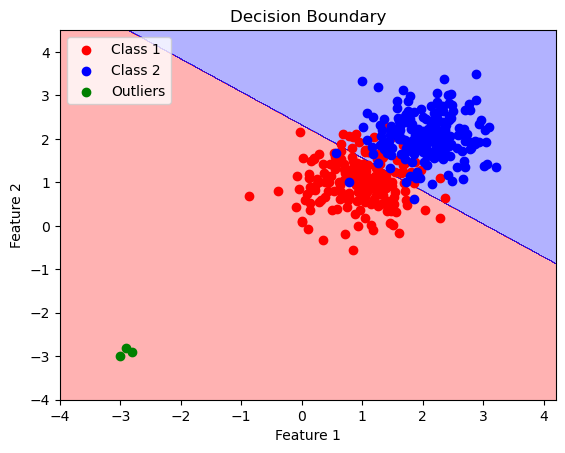

In [44]:
# Decision boundary using least squares

#Get the min and max values of the features
x_min, x_max = te_data[:, 0].min() - 1, te_data[:, 0].max() + 1
x_min = min(x_min, outliers[:,0].min() - 1)
y_min, y_max = te_data[:, 1].min() - 1, te_data[:, 1].max() + 1
y_min = min(y_min, outliers[:,1].min() - 1)

#Create the mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#Predict the labels of the mesh grid points
Z = LS_Classify(tr_data, tr_targets, np.c_[xx.ravel(), yy.ravel()])
Z = np.sign(Z)
Z = Z.reshape(xx.shape)

#Plot the contour of the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.scatter(class1_te[:,0], class1_te[:,1], color='r', label='Class 1')
plt.scatter(class2_te[:,0], class2_te[:,1], color='b', label='Class 2')
plt.scatter(outliers[:,0], outliers[:,1], color='g', label='Outliers')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

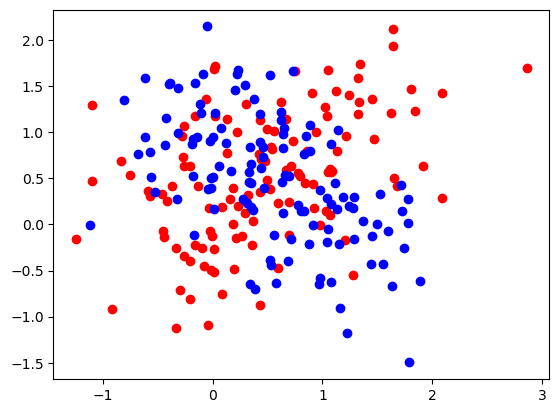

In [45]:
##########################################
#Part-3)-(d): Data generation XOR
##########################################

#Set the parameters of Gaussian distribution
class1_mean1 = [0,0]           #Mean of Gaussian1
class1_mean2 = [1,1]           #Mean of Gaussian2
class2_mean1 = [0,1]           #Mean of Gaussian1
class2_mean2 = [1,0]           #Mean of Gaussian2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate  data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution

class1_data1 = np.random.multivariate_normal(class1_mean1, cov, 60)
class1_data2 = np.random.multivariate_normal(class1_mean2, cov, 60)
class2_data1 = np.random.multivariate_normal(class2_mean1, cov, 60)
class2_data2 = np.random.multivariate_normal(class2_mean2, cov, 60)

#Obtain 2-class dataset

data = np.concatenate((class1_data1, class1_data2, class2_data1, class2_data2), axis=0)
targets = np.concatenate((np.zeros(120), np.ones(120)))
targets = 2*targets - 1

#Create train test splits, 60% training and 40% testing

data_targets = np.column_stack((data, targets))
np.random.shuffle(data_targets)

tr_data = data_targets[:144, :2]
tr_targets = data_targets[:144, 2]
te_data = data_targets[144:, :2]
te_targets = data_targets[144:, 2]

plt.scatter(class1_data1[:,0], class1_data1[:,1], color='r', label='Class 1')
plt.scatter(class1_data2[:,0], class1_data2[:,1], color='r', label='Class 1')
plt.scatter(class2_data1[:,0], class2_data1[:,1], color='b', label='Class 2')
plt.scatter(class2_data2[:,0], class2_data2[:,1], color='b', label='Class 2')
plt.show()

In [46]:
#Classify this dataset using perceptron algorithm

predictions, w = Perceptron(tr_data, tr_targets, te_data)

#Compute the accuracy

accuracy = Perceptron_Accuracy(te_targets, predictions)
print('Accuracy with Perceptron:', accuracy*100)

Accuracy with Perceptron: 43.75


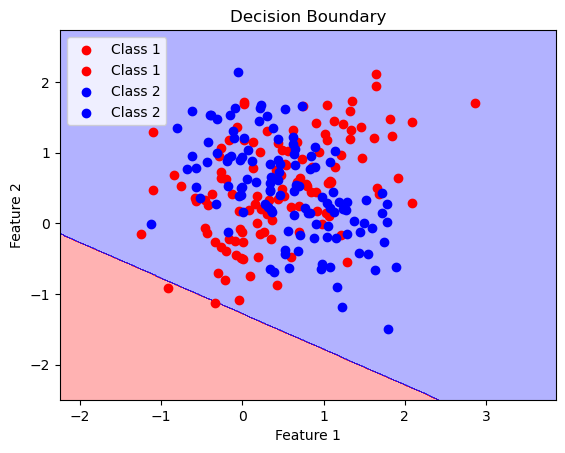

In [47]:
#Plot the decision boundary

#Get the min and max values of the features
x_min, x_max = te_data[:, 0].min() - 1, te_data[:, 0].max() + 1
y_min, y_max = te_data[:, 1].min() - 1, te_data[:, 1].max() + 1

#Create the mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#Predict the labels of the mesh grid points
Z = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()] @ w
Z = np.sign(Z)
Z = Z.reshape(xx.shape)

#Plot the contour of the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_data1[:,0], class1_data1[:,1], color='r', label='Class 1')
plt.scatter(class1_data2[:,0], class1_data2[:,1], color='r', label='Class 1')
plt.scatter(class2_data1[:,0], class2_data1[:,1], color='b', label='Class 2')
plt.scatter(class2_data2[:,0], class2_data2[:,1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

<b> Report your observations </b>

1. The decision boundary obtained using the perceptron algorithm is different from the decision boundary obtained using the pseudo-inverse solution. The decision boundary obtained using the perceptron algorithm is not fixed and changes with each iteration.

2. Least squares classification is sensitive to outliers, whereas the perceptron algorithm is not sensitive to outliers. The decision boundary obtained using the perceptron algorithm is not affected by the presence of outliers. The decision boundary obtained using the least squares classification is affected by the presence of outliers, leaving certain red points in blue region to accommodate the outlier.

3. The XOR problem is not linearly separable, and the perceptron algorithm is not able to classify the data points correctly.


<b> Part (4) : Understanding the decision boundaries of MAP approach to classification - </b> Decision boundary in 2 class classification problem is the locus of points satisfying $p(c_{1}/x)$ = $p(c_{2}/x)$. Where $c_{1}$ and $c_{2}$ are the class indicators and $x$ is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them.

**a). Class distributions share the same covariance matrix: Linear decision boundary.** 0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 4  \\ 1 \end{bmatrix}$, and $\Sigma_{1}= \Sigma_{2} = \Sigma =  \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}$

1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
4. Plot the decision boundaries for all the three cases in three different subplots.

**b). Class distributions have different covariance matrices: Non-linear decision boundary.** 0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 3  \\ 1 \end{bmatrix}$, $\Sigma_{1}=   \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.02 \end{bmatrix}$, and $\Sigma_{2}=   \begin{bmatrix} 0.02 & 0.0  \\ 0.0 & 0.2 \end{bmatrix}$

1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
4. Plot the decision boundaries for all the three cases in three different subplots.

**c). Report your observations**


In [48]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

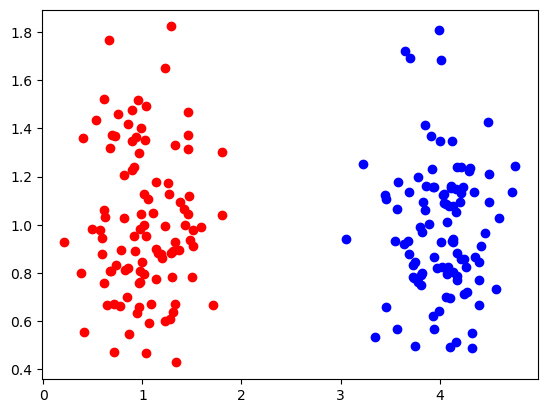

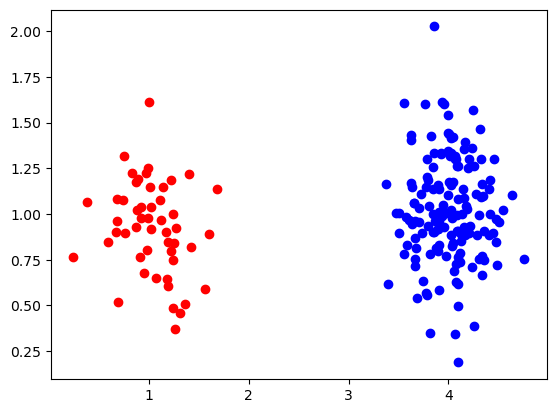

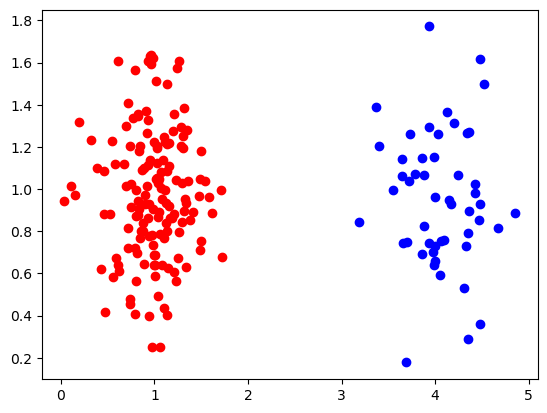

In [49]:
##########################################
#Part-4a)-0: Data Generation
##########################################
mean1 = [1,1]           #Mean of class1
mean2 = [4,1]           #Mean of class2
cov1 = [[0.1,0],[0,0.1]] #Covariance matrix for class1
cov2 = [[0.1,0],[0,0.1]] #Covariance matrix for class2

#Case1: Generate 100 samples from each class. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution

class1_tr_1 = np.random.multivariate_normal(mean1, cov1, 100)
class2_tr_1 = np.random.multivariate_normal(mean2, cov2, 100)
tr_data_1 = np.concatenate((class1_tr_1, class2_tr_1), axis=0)
tr_targets_1 = np.concatenate((np.zeros(100), np.ones(100)))

plt.scatter(class1_tr_1[:,0], class1_tr_1[:,1], color='r', label='Class 1')
plt.scatter(class2_tr_1[:,0], class2_tr_1[:,1], color='b', label='Class 2')
plt.show()

#Case2: Generate 50 samples from class1 and 150 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution

class1_tr_2 = np.random.multivariate_normal(mean1, cov1, 50)
class2_tr_2 = np.random.multivariate_normal(mean2, cov2, 150)
tr_data_2 = np.concatenate((class1_tr_2, class2_tr_2), axis=0)
tr_targets_2 = np.concatenate((np.zeros(50), np.ones(150)))

plt.scatter(class1_tr_2[:,0], class1_tr_2[:,1], color='r', label='Class 1')
plt.scatter(class2_tr_2[:,0], class2_tr_2[:,1], color='b', label='Class 2')
plt.show()

#Case3: Generate 150 samples from class1 and 50 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution

class1_tr_3 = np.random.multivariate_normal(mean1, cov1, 150)
class2_tr_3 = np.random.multivariate_normal(mean2, cov2, 50)
tr_data_3 = np.concatenate((class1_tr_3, class2_tr_3), axis=0)
tr_targets_3 = np.concatenate((np.zeros(150), np.ones(50)))

plt.scatter(class1_tr_3[:,0], class1_tr_3[:,1], color='r', label='Class 1')
plt.scatter(class2_tr_3[:,0], class2_tr_3[:,1], color='b', label='Class 2')
plt.show()

In [50]:
##########################################
#Part-4a)-4: Plot the decision regions for all the three cases
##########################################
#Complete the below function
def decisionBoundary(X_train, Y_train):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w
    p_c1 = np.mean(Y_train==0)
    p_c2 = 1. - p_c1

    mean_1 = np.mean(X_train[Y_train==0], axis=0)
    mean_2 = np.mean(X_train[Y_train==1], axis=0)

    cov1 = np.cov(X_train[Y_train==0].T)
    cov2 = np.cov(X_train[Y_train==1].T)

    cov = p_c1 * cov1 + p_c2 * cov2

    w = np.linalg.inv(cov) @ (mean_1 - mean_2)
    w0 = -0.5 * mean_1.T @ np.linalg.inv(cov) @ mean_1 + 0.5 * mean_2.T @ np.linalg.inv(cov) @ mean_2 + np.log(p_c1/p_c2)

    return np.array([w0]+list(w))

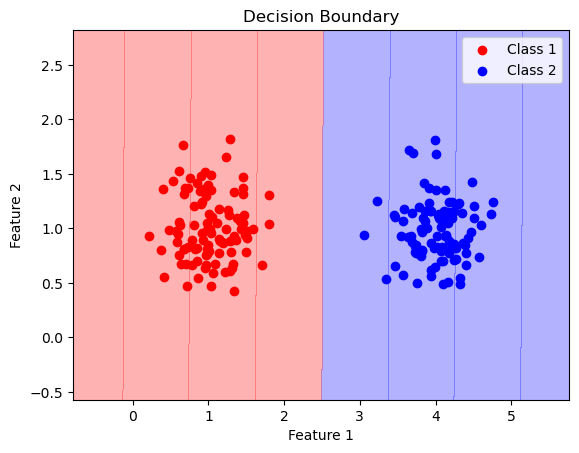

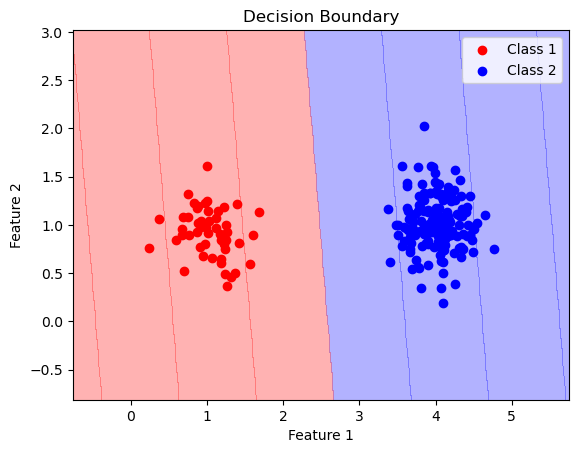

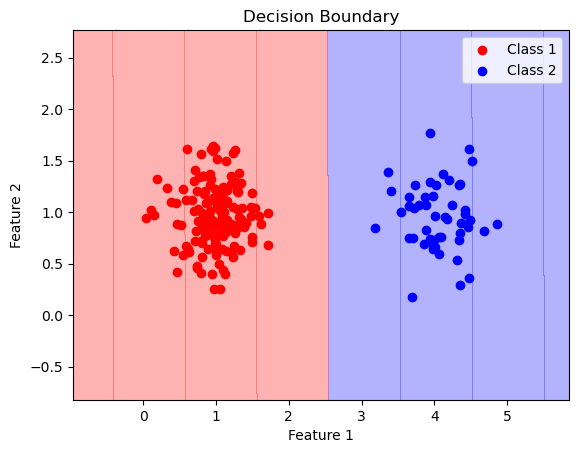

In [51]:
#Plot the decision regions

#Case1
w = decisionBoundary(tr_data_1, tr_targets_1)
x_min, x_max = tr_data_1[:, 0].min() - 1, tr_data_1[:, 0].max() + 1
y_min, y_max = tr_data_1[:, 1].min() - 1, tr_data_1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()] @ w
Z = np.round(Z)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('b', 'r')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_tr_1[:,0], class1_tr_1[:,1], color='r', label='Class 1')
plt.scatter(class2_tr_1[:,0], class2_tr_1[:,1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#Case2
w = decisionBoundary(tr_data_2, tr_targets_2)
x_min, x_max = tr_data_2[:, 0].min() - 1, tr_data_2[:, 0].max() + 1
y_min, y_max = tr_data_2[:, 1].min() - 1, tr_data_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()] @ w
Z = np.round(Z)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('b', 'r')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_tr_2[:,0], class1_tr_2[:,1], color='r', label='Class 1')
plt.scatter(class2_tr_2[:,0], class2_tr_2[:,1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#Case3
w = decisionBoundary(tr_data_3, tr_targets_3)
x_min, x_max = tr_data_3[:, 0].min() - 1, tr_data_3[:, 0].max() + 1
y_min, y_max = tr_data_3[:, 1].min() - 1, tr_data_3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()] @ w
Z = np.round(Z)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('b', 'r')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_tr_3[:,0], class1_tr_3[:,1], color='r', label='Class 1')
plt.scatter(class2_tr_3[:,0], class2_tr_3[:,1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

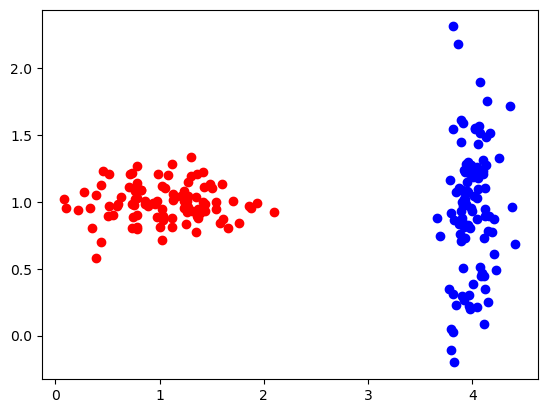

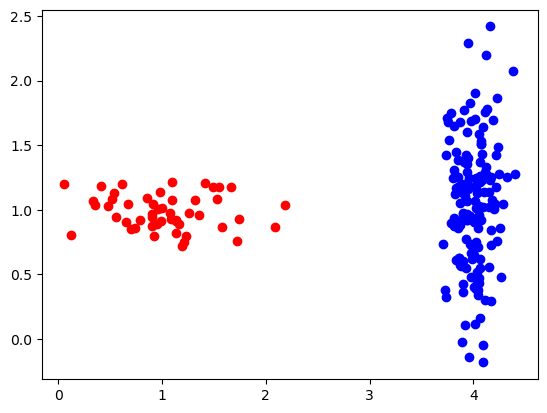

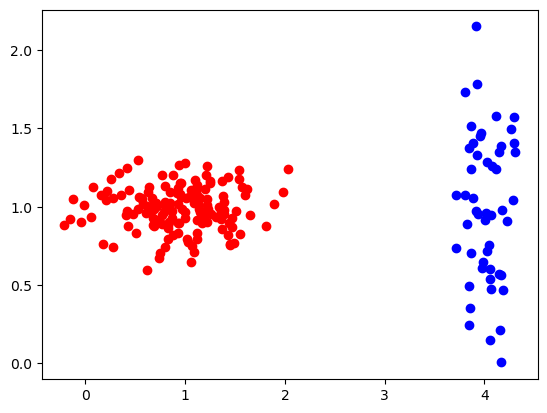

In [59]:
##########################################
#Part-4b)-0: Data Generation
##########################################
m1 = [1,1]           #Mean of class1
m2 = [4,1]           #Mean of class2
cov1 = [[0.2, 0.0],[0.0, 0.02]] #Covariance matrix for class1
cov2 = [[0.02, 0.0],[0.0, 0.2]] #Covariance matrix for class2

# Case 1: Generate 100 samples from each class. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution

class1_tr_1 = np.random.multivariate_normal(m1, cov1, 100)
class2_tr_1 = np.random.multivariate_normal(m2, cov2, 100)
tr_data_1 = np.concatenate((class1_tr_1, class2_tr_1), axis=0)
tr_targets_1 = np.concatenate((np.zeros(100), np.ones(100)))

plt.scatter(class1_tr_1[:,0], class1_tr_1[:,1], color='r', label='Class 1')
plt.scatter(class2_tr_1[:,0], class2_tr_1[:,1], color='b', label='Class 2')
plt.show()

# Case 2: Generate 50 samples from class1 and 150 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution

class1_tr_2 = np.random.multivariate_normal(m1, cov1, 50)
class2_tr_2 = np.random.multivariate_normal(m2, cov2, 150)
tr_data_2 = np.concatenate((class1_tr_2, class2_tr_2), axis=0)
tr_targets_2 = np.concatenate((np.zeros(50), np.ones(150)))

plt.scatter(class1_tr_2[:,0], class1_tr_2[:,1], color='r', label='Class 1')
plt.scatter(class2_tr_2[:,0], class2_tr_2[:,1], color='b', label='Class 2')
plt.show()

# Case 3: Generate 150 samples from class1 and 50 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution

class1_tr_3 = np.random.multivariate_normal(m1, cov1, 150)
class2_tr_3 = np.random.multivariate_normal(m2, cov2, 50)
tr_data_3 = np.concatenate((class1_tr_3, class2_tr_3), axis=0)
tr_targets_3 = np.concatenate((np.zeros(150), np.ones(50)))

plt.scatter(class1_tr_3[:,0], class1_tr_3[:,1], color='r', label='Class 1')
plt.scatter(class2_tr_3[:,0], class2_tr_3[:,1], color='b', label='Class 2')
plt.show()

In [56]:
##########################################
#Part-4b)-4: Plot the decision regions for all the three cases
##########################################
#Complete the below function
def decisionBoundary(X_train, Y_train, X_test):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w
    p_c1 = np.mean(Y_train==0)
    p_c2 = 1. - p_c1

    mean_1 = np.mean(X_train[Y_train==0], axis=0)
    mean_2 = np.mean(X_train[Y_train==1], axis=0)

    cov1 = np.cov(X_train[Y_train==0].T)
    cov2 = np.cov(X_train[Y_train==1].T)

    #Compute predictions on test data

    predictions = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        x = X_test[i]
        g1 = -0.5 * (x - mean_1).T @ np.linalg.inv(cov1) @ (x - mean_1) - 0.5 * np.log(np.linalg.det(cov1)) + np.log(p_c1)
        g2 = -0.5 * (x - mean_2).T @ np.linalg.inv(cov2) @ (x - mean_2) - 0.5 * np.log(np.linalg.det(cov2)) + np.log(p_c2)
        predictions[i] = 0 if g1 > g2 else 1

    return predictions

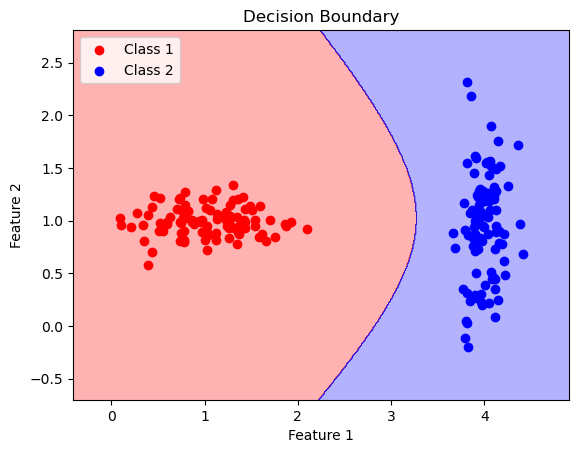

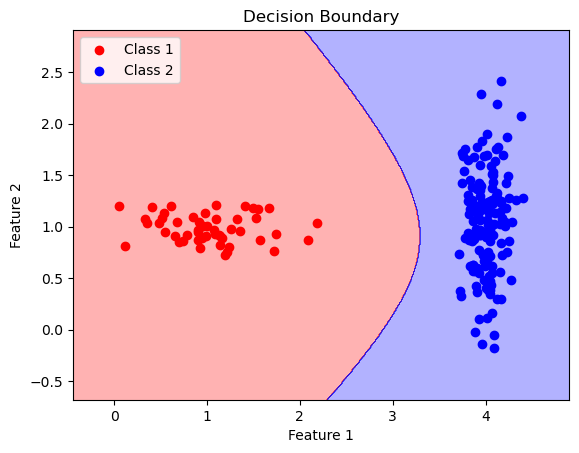

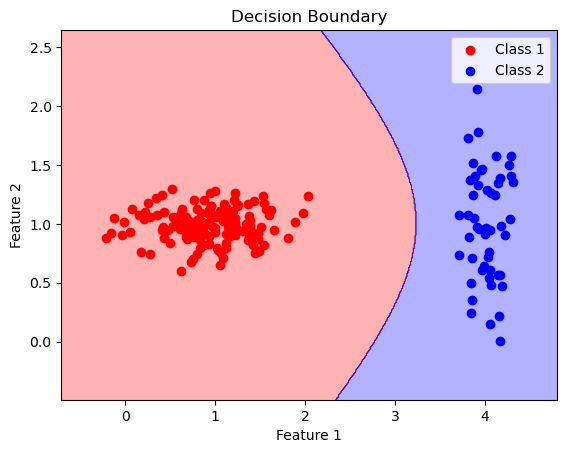

In [61]:
# Plot the decision regions

#Case1
x_min, x_max = tr_data_1[:, 0].min() - 0.5, tr_data_1[:, 0].max() + 0.5
y_min, y_max = tr_data_1[:, 1].min() - 0.5, tr_data_1[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
z = decisionBoundary(tr_data_1, tr_targets_1, np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_tr_1[:,0], class1_tr_1[:,1], color='r', label='Class 1')
plt.scatter(class2_tr_1[:,0], class2_tr_1[:,1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#Case2
x_min, x_max = tr_data_2[:, 0].min() - 0.5, tr_data_2[:, 0].max() + 0.5
y_min, y_max = tr_data_2[:, 1].min() - 0.5, tr_data_2[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
z = decisionBoundary(tr_data_2, tr_targets_2, np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_tr_2[:,0], class1_tr_2[:,1], color='r', label='Class 1')
plt.scatter(class2_tr_2[:,0], class2_tr_2[:,1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#Case3
x_min, x_max = tr_data_3[:, 0].min() - 0.5, tr_data_3[:, 0].max() + 0.5
y_min, y_max = tr_data_3[:, 1].min() - 0.5, tr_data_3[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
z = decisionBoundary(tr_data_3, tr_targets_3, np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_tr_3[:,0], class1_tr_3[:,1], color='r', label='Class 1')
plt.scatter(class2_tr_3[:,0], class2_tr_3[:,1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


<b> Report your observations </b>

1. The decision boundary is linear when the class distributions share the same covariance matrix. The decision boundary is non-linear when the class distributions have different covariance matrices.

2. When number of samples from class1 and class2 are equal, the decision boundary is equidistant from the two class distributions. When the number of samples from class1 is less than the number of samples from class2, the decision boundary is closer to class1. When the number of samples from class1 is greater than the number of samples from class2, the decision boundary is closer to class2. The decision boundary shifts towards the class with more samples.

3. The decision boundary is affected by the prior probability of the class distributions. When the prior probability of class1 is less than the prior probability of class2, the decision boundary is closer to class1. When the prior probability of class1 is greater than the prior probability of class2, the decision boundary is closer to class2.


<b> Part-5) Classification using logistic regression ( Iterative reweighted least squares approach ): </b> logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. With the provided training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data, X_test.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.

c). Evaluate the classification performance, i.e., compute the accuracy on the test data.

d). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

e). Introduce genuine outliers to one of the class datasets generated previously. Then, conduct Least Squares classification and Logistic Regression on this modified dataset. Plot the decision boundaries/regions and provide insights into the differences between their outcomes.

f). Report your observations


In [62]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

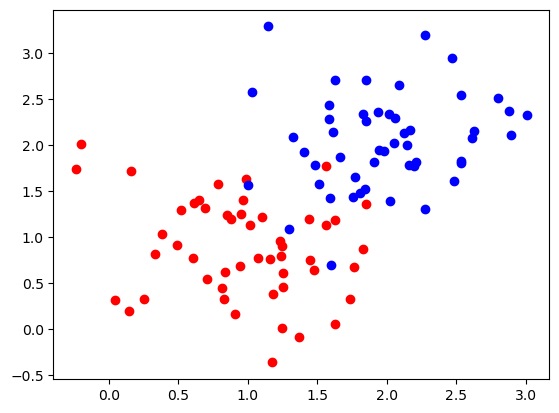

In [105]:
##################################################
#Part-5)-1: Data generation
##################################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)
class2_tr = np.random.multivariate_normal(mean2, cov, 50)
tr_data = np.concatenate((class1_tr, class2_tr), axis=0)
tr_targets = np.concatenate((np.zeros(50), np.ones(50)))

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)
class2_te = np.random.multivariate_normal(mean2, cov, 200)
te_data = np.concatenate((class1_te, class2_te), axis=0)
te_targets = np.concatenate((np.zeros(200), np.ones(200)))

plt.scatter(class1_tr[:,0], class1_tr[:,1], color='r', label='Class 1')
plt.scatter(class2_tr[:,0], class2_tr[:,1], color='b', label='Class 2')
plt.show()

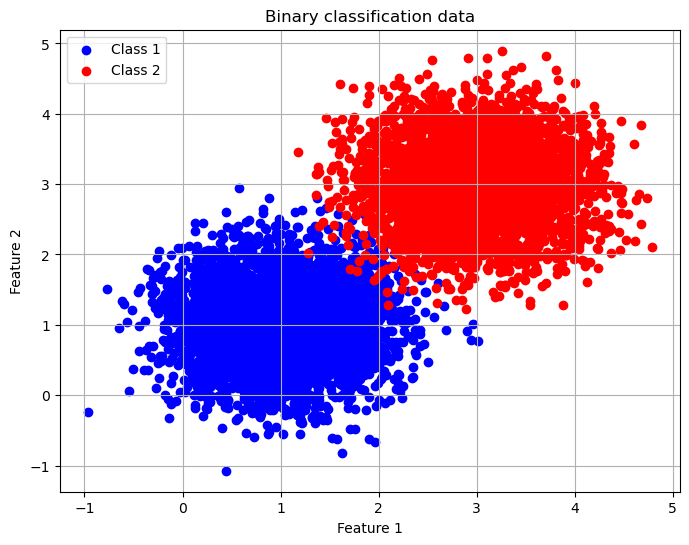

In [1]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))]).astype(int)

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))]).astype(int)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
##################################################
#Part-5)-b: Complete the below logistic regression function
##################################################
def Logistic_Regression(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Predictions on test data

    max_iter = 20  #max number of ierations for parameter update
    threshold = 0.5 #threshold for classification
    X = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1) #Data. Append ones to the training data to take care of the bias
    X_t = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1) #Data. Append ones to the testing data to take care of the bias
    w = np.random.rand(X.shape[1]) #Initialize the weight vector
    for iter in range(0,max_iter,1):
        preds = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            if abs(X[i]@w) < 30:
                preds[i] = 1 / (1 + math.exp(-X[i] @ w))
            elif X[i]@w > 30:
                preds[i] = 1
            else:
                preds[i] = 0
        error = preds - Y_train #Difference between preds and Y_train

        #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate

        grad = X.T @ error
        H = X.T @ np.diag(preds * (1 - preds)) @ X

        #Update the weight vector

        w = w - np.linalg.pinv(H) @ grad

    #Test data predictions

    test_preds = np.zeros(X_t.shape[0])
    for i in range(X_t.shape[0]):
        if abs(X_t[i]@w) < 30:
            test_preds[i] = 1 / (1 + math.exp(-X_t[i] @ w))
        elif X_t[i]@w > 30:
            test_preds[i] = 1
        else:
            test_preds[i] = 0

    #Compare the predictions with 0, to output the decision

    test_preds = (test_preds > threshold).astype(int)

    #Return the predicted test labels
    return test_preds

Y_pred = Logistic_Regression(tr_data, tr_targets, te_data)

NameError: name 'math' is not defined

In [109]:
###############################################
#Part-5)-c:
###############################################
def LR_Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth and predicted lables of test data
    #Outputs: Accuracy

    acc = np.mean(Y_test == Y_pred)

    #Compute and return the accuracy
    return acc


accuracy = LR_Accuracy(te_targets, Y_pred)
print('Accuracy with Logistic Regression:', accuracy*100)

Accuracy with Logistic Regression: 91.0


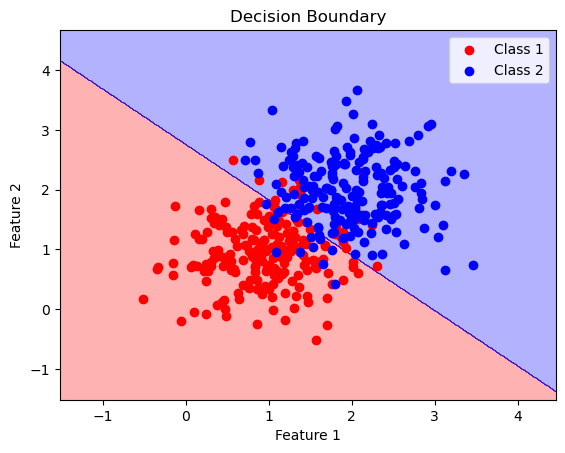

In [110]:
##########################################
#Part-5)-d: Plot the decision regions. Overlay the test points on the plot
##########################################

#Get the min and max values of the features
x_min, x_max = te_data[:, 0].min() - 1, te_data[:, 0].max() + 1
y_min, y_max = te_data[:, 1].min() - 1, te_data[:, 1].max() + 1

#Create the mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

#Predict the labels of the mesh grid points
Z = Logistic_Regression(tr_data, tr_targets, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Plot the contour of the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_te[:,0], class1_te[:,1], color='r', label='Class 1')
plt.scatter(class2_te[:,0], class2_te[:,1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

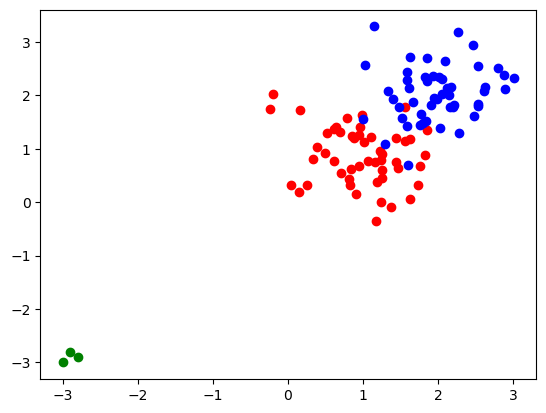

In [111]:
##########################################
#Part-5)-e: Logistic regression for the data with true outliers
##########################################

#Add the outliers to the training data
outliers = np.array([[-3,-3], [-2.8,-2.9], [-2.9,-2.8]])
tr_data = np.concatenate((tr_data, outliers), axis=0)
tr_targets = np.concatenate((tr_targets, np.ones(3)))

plt.scatter(class1_tr[:,0], class1_tr[:,1], color='r', label='Class 1')
plt.scatter(class2_tr[:,0], class2_tr[:,1], color='b', label='Class 2')
plt.scatter(outliers[:,0], outliers[:,1], color='g', label='Outliers')
plt.show()

In [112]:
# Least Squares classification and Logistic Regression on this modified dataset

#Least Squares classification
def LS_Classify(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, Testing data
    #Outputs: Predictions on test data

    X = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1) #Data. Append ones to the training data to take care of the bias
    w = np.linalg.pinv(X) @ Y_train #Compute the weight vector
    X_t = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1) #Data. Append ones to the testing data to take care of the bias
    preds = X_t @ w #Predictions on X_t

    #Compare the predictions with 0, to output the decision
    preds = np.round(preds)

    #Return the predicted test labels
    return preds

def LS_Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth and predicted lables of test data
    #Outputs: Accuracy

    acc = np.mean(Y_test == Y_pred)

    #Compute and return the accuracy
    return acc

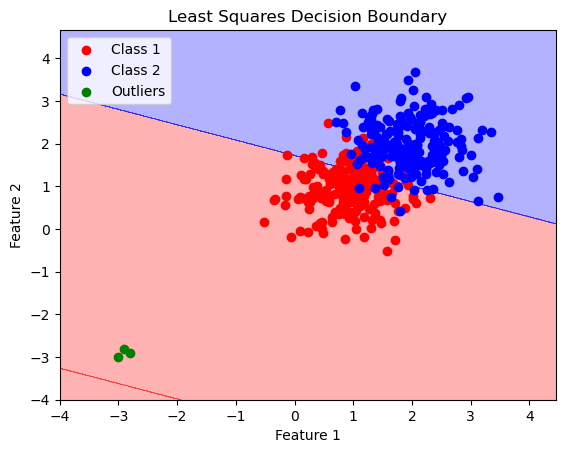

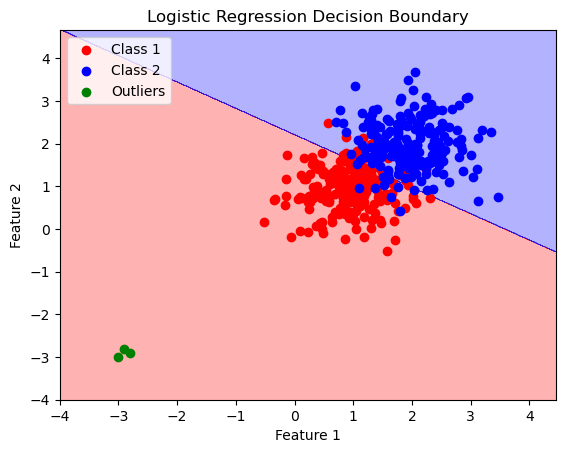

In [113]:
# Plot the decision boundary using least squares and logistic regression

#Least Squares classification
x_max = max(te_data[:,0].max(), outliers[:,0].max()) + 1
x_min = min(te_data[:,0].min(), outliers[:,0].min()) - 1
y_max = max(te_data[:,1].max(), outliers[:,1].max()) + 1
y_min = min(te_data[:,1].min(), outliers[:,1].min()) - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = LS_Classify(tr_data, tr_targets, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_te[:,0], class1_te[:,1], color='r', label='Class 1')
plt.scatter(class2_te[:,0], class2_te[:,1], color='b', label='Class 2')
plt.scatter(outliers[:,0], outliers[:,1], color='g', label='Outliers')
plt.title('Least Squares Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Logistic Regression
x_max = max(te_data[:,0].max(), outliers[:,0].max()) + 1
x_min = min(te_data[:,0].min(), outliers[:,0].min()) - 1
y_max = max(te_data[:,1].max(), outliers[:,1].max()) + 1
y_min = min(te_data[:,1].min(), outliers[:,1].min()) - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = Logistic_Regression(tr_data, tr_targets, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(class1_te[:,0], class1_te[:,1], color='r', label='Class 1')
plt.scatter(class2_te[:,0], class2_te[:,1], color='b', label='Class 2')
plt.scatter(outliers[:,0], outliers[:,1], color='g', label='Outliers')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

<b> Report your observations </b>

1. Since Logistic Regression is an iterative method, the decision boundary obtained using Logistic Regression is not fixed and changes with changes in the number of iterations and initial values of the weight vector.

2. Logistic Regression is not sensitive to outliers, and the decision boundary obtained using Logistic Regression is not affected by the presence of outliers. The decision boundary obtained using Least Squares classification is affected by the presence of outliers, leaving certain red points in blue region to accommodate the outlier.

<b> Part (6) : Estimating the parameters of Gaussian Mixture Models (GMM) using Expectation-Maximization (EM) algorithm </b>

<dt> <b> a. Generating synthetic data : </b>  This part describes the steps involved in generating the synthetic data. </dt>

<dt>  1. Let us consider the GMM with Bivariate Gaussians   </dt>
<dd>  - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this asignment.  </dd>
<br>
<dt>  <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>   </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>

<dd>  - Pick one Gaussian following the selection probability as  $\pi$    </dd>
<dd>  - Sample the data point from the selected Bivariate Gaussian distribution    </dd>
<dd>  - Repeat the process N times to get the entire data set  </dd>
<dt>  2.Create the synthetic data set with the number of mixtures as 2.  </dt>
<dt>  3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt> </dd>

<dt> <b> b. Implementation of Expectation and Maximization (EM) algorithm : </b> This part focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM). </dt>

<dt>  1. Chose the number of mixtures (M) and initialize the parameters of GMM model  </dt>
<dd>  - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability.  </dd>

<dt>   2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM  </dt>
<br>

<dd>  <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center>  </dd>

<br>

<dd>   Where N is the total number of data points and M is the total number of Gaussians in GMM   </dd>

<dd>   - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point   </dd>

<dd>   - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian   </dd>

<dt>   3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood. </dt>

<dd>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
 </dd>

<dd>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
 </dd>

<dd>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
 </dd>

<dd>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
 </dd>

<dt>  4. Compute the log-likelihood with the updated parameters  </dt>
<dt>   5. Repeat the expectation and maximization steps untill convergence  </dt>

<dt>  <b> c. Illustration of EM iterations </b>  </dt>

<dt>   5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points.  </dt>

<dt>  <b> d. Understanding the issues with EM algorithm </b>  </dt>
<dt>   6. Check the influence of initialization on the convergence of the EM algorithm and fit quality.  </dt>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section    </dd>
<dt>   6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </dt>
<dd>   - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </dd>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section  </dd>


In [114]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import norm, multivariate_normal
import sys
import math

In [115]:
##########################################
#Part-6)-a: Generating synthetic data
##########################################

def generateData(pi, mu, sigma, N):
    ############################################################################
    #pi = weights of Gaussians, mu = mean of Gaussians, sigma = convariance of Gaussians, N = number of data points
    #Steps
    #1.Select th Gaussian following the probability distribution as pi
    #2.Sample the data points from the selected Gaussian
    #3.Repeat the process N times to get N data points
    #4.Return the sampled data
    ############################################################################
    #You may look into "random.choices" and "np.random.multivariate_normal" functions

    data = []
    labels = []
    for i in range(N):
        c = rand.choices(range(len(pi)), pi)[0]
        data.append(np.random.multivariate_normal(mu[c], sigma[c]))
        labels.append(c)

    return np.asarray(data), np.asarray(labels)
    ############################################################################

In [116]:
############################################################################
#Chose the appropriate means ($\mu$), covariances ($\Sigma$), and weights
############################################################################
mu1 = [-1.0, -1.0]    #Mean vector of component1 in GMM
sig1 = [[0.15, 0.1],[0.1, 0.25]]   #Full covariance matrix of component1 in GMM
mu2 = [1.0, 1.0]    #Mean vector of component2 in GMM
sig2 = [[0.3, -0.25],[-0.25, 0.25]]  #Full covariance matrix of component2 in GMM
pi = [0.6, 0.4]    #Prior probabilities

n_points = 200 #Number of points

# Spherical covariances
sig1_s = [[0.2, 0],[0, 0.2]]
sig2_s = [[0.1, 0],[0, 0.1]]
# Diagonal covariances
sig1_d = [[0.1, 0],[0, 0.2]]
sig2_d = [[0.2, 0],[0, 0.1]]

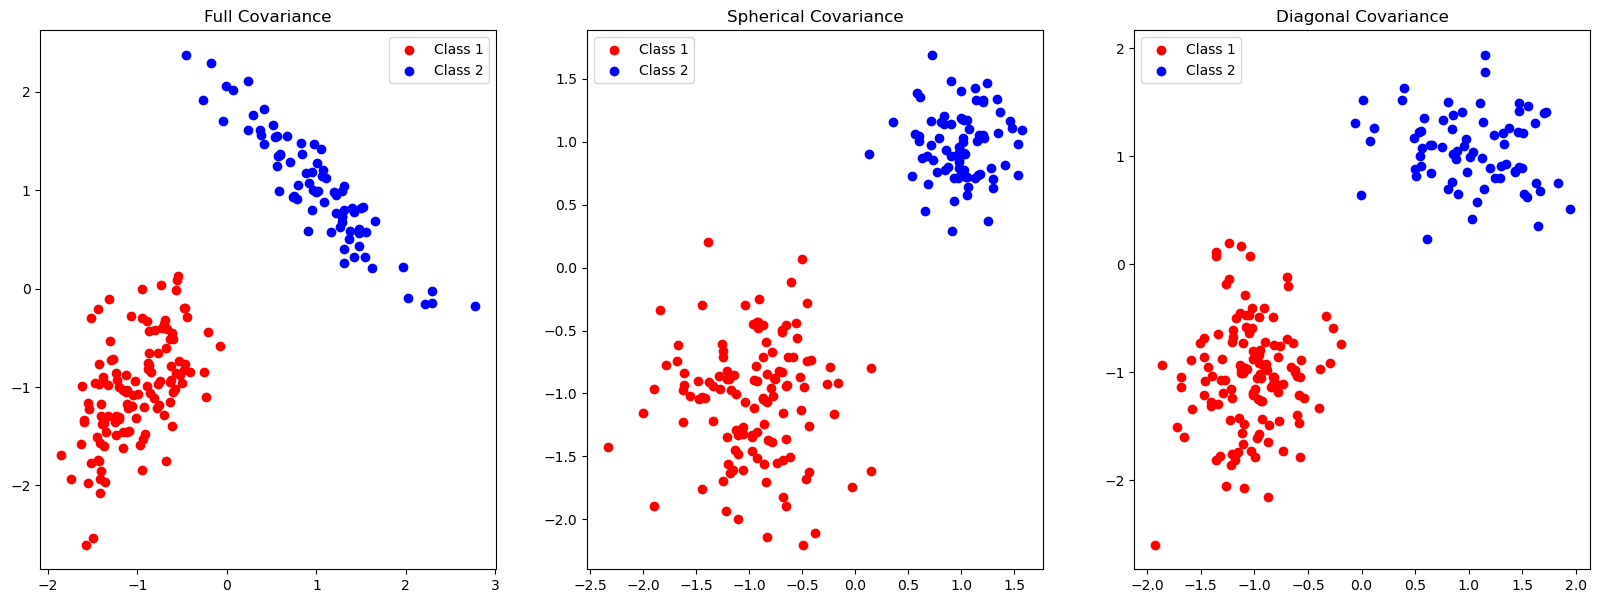

In [117]:
############################################################################
#Create the synthetic data set
############################################################################

data_full, labels_full = generateData(pi, [mu1, mu2], [sig1, sig2], 200)
data_sp, labels_sp = generateData(pi, [mu1, mu2], [sig1_s, sig2_s], 200)
data_dg, labels_dg = generateData(pi, [mu1, mu2], [sig1_d, sig2_d], 200)

############################################################################
#Plot the synthetic data set
############################################################################

fig, ax = plt.subplots(1,3, figsize=(20,7))

#Visualize the data sampled from the GMM with full covariance matrix
ax[0].set_title('Full Covariance')
ax[0].scatter(data_full[labels_full==0,0], data_full[labels_full==0,1], color='r', label='Class 1')
ax[0].scatter(data_full[labels_full==1,0], data_full[labels_full==1,1], color='b', label='Class 2')
ax[0].legend()

#Visualize the data sampled from the GMM with spherical covariance matrix
ax[1].set_title('Spherical Covariance')
ax[1].scatter(data_sp[labels_sp==0,0], data_sp[labels_sp==0,1], color='r', label='Class 1')
ax[1].scatter(data_sp[labels_sp==1,0], data_sp[labels_sp==1,1], color='b', label='Class 2')
ax[1].legend()

#Visualize the data sampled from the GMM with diagonal covariance matrix
ax[2].set_title('Diagonal Covariance')
ax[2].scatter(data_dg[labels_dg==0,0], data_dg[labels_dg==0,1], color='r', label='Class 1')
ax[2].scatter(data_dg[labels_dg==1,0], data_dg[labels_dg==1,1], color='b', label='Class 2')
ax[2].legend()

plt.show()

In [118]:
##########################################
#Part-6)-b: Implimentation of Expectation-Maximization (EM) algorithm
##########################################

############################################################################
#Write a function to compute the log-likelihood of the data given the parameters
############################################################################
def likelihood(data, pi, mu, sigma, log_likelihood=False, likelihoods=False):
    #Inputs: data, parameters of GMM model
    #Outputs: likelihood
    if log_likelihood:
        ll = 0
        for x in data:
            s = 0
            for c in range(len(pi)):
                s += pi[c] * np.exp(-0.5 * (x - mu[c]).T @ np.linalg.inv(sigma[c]) @ (x - mu[c])) / np.sqrt(np.linalg.det(sigma[c]))
            ll += np.log(s)
        return ll
    return

############################################################################
#Write a function for the expectation step
############################################################################
def expectation(data, pi, mu, sigma):
    #Inputs: data, parameters of GMM model
    #Outputs: gamma
    gamma = np.zeros((len(data), len(pi)))
    for n in range(len(data)):
        #Iterate through the data points
        for k in range(len(pi)):
            #Iterate through the components in GMM
            numerator = pi[k] * np.exp(-0.5 * (data[n] - mu[k]).T @ np.linalg.inv(sigma[k]) @ (data[n] - mu[k])) / np.sqrt(np.linalg.det(sigma[k]))
            denominator = 0
            for j in range(len(pi)):
                denominator += pi[j] * np.exp(-0.5 * (data[n] - mu[j]).T @ np.linalg.inv(sigma[j]) @ (data[n] - mu[j])) / np.sqrt(np.linalg.det(sigma[j]))
                gamma[n,k] = numerator/denominator
    return gamma

############################################################################
#Write a function for the maximization step.
############################################################################
def maximization(data, gamma):
    #Inputs: data, gamma
    #Outputs: Updated parameters of GMM model

    #Update mu

    mu = np.zeros((gamma.shape[1], data.shape[1]))
    for k in range(gamma.shape[1]):
        mu[k] = np.sum(gamma[:,k].reshape(-1,1) * data, axis=0) / np.sum(gamma[:,k])

    #Update sigma

    sigma = np.zeros((gamma.shape[1], data.shape[1], data.shape[1]))
    for k in range(gamma.shape[1]):
        sigma[k] = 0
        for n in range(gamma.shape[0]):
            sigma[k] += gamma[n,k] * np.outer(data[n] - mu[k], data[n] - mu[k])
        sigma[k] /= np.sum(gamma[:,k])

    #Update pi

    pi = np.zeros(gamma.shape[1])
    for k in range(gamma.shape[1]):
        pi[k] = np.sum(gamma[:,k]) / np.sum(gamma)

    #Return the parameters of GMM model
    return pi, mu, sigma

#Complete the below function. It plots the contours
def plot_contours(data, labels, pi, mu, sigma):

    #Get the min and max values of the features
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    #Create the mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    #Predict the labels of the mesh grid points
    Z = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            x = np.array([xx[i,j], yy[i,j]])
            s = 0
            for c in range(len(pi)):
                s += pi[c] * np.exp(-0.5 * (x - mu[c]).T @ np.linalg.inv(sigma[c]) @ (x - mu[c])) / np.sqrt(np.linalg.det(sigma[c]))
            Z[i,j] = s

    #Plot the contour of the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('r', 'b')))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(data[labels==0,0], data[labels==0,1], color='r', label='Class 1')
    plt.scatter(data[labels==1,0], data[labels==1,1], color='b', label='Class 2')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

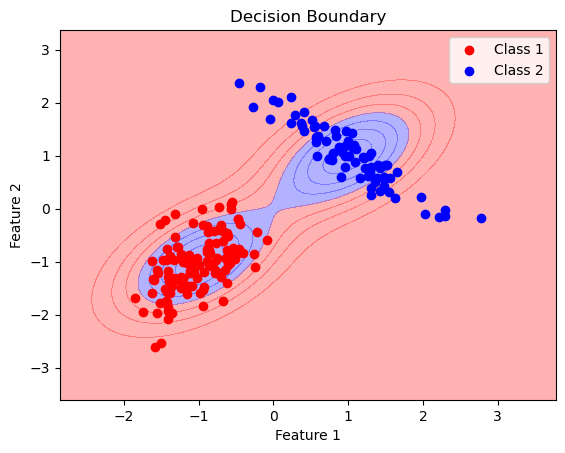

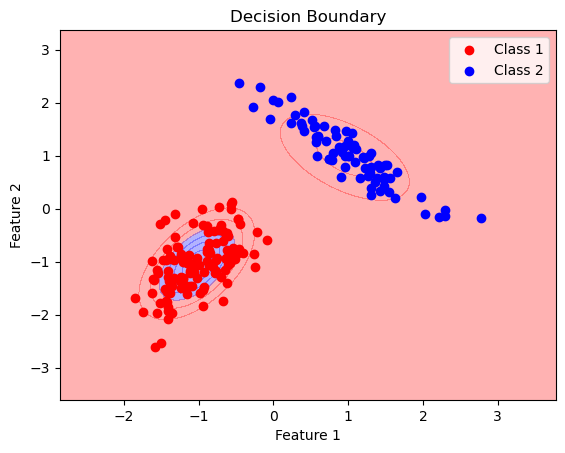

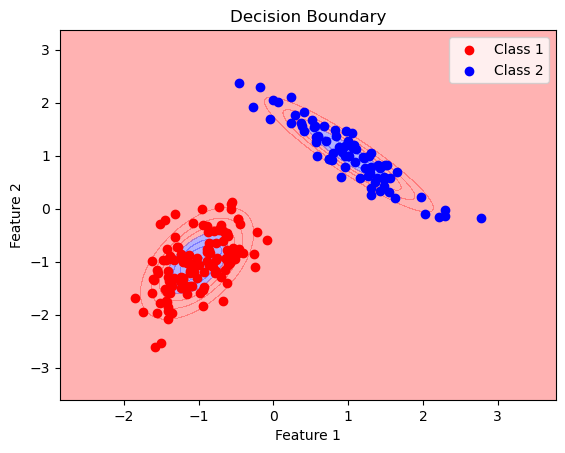

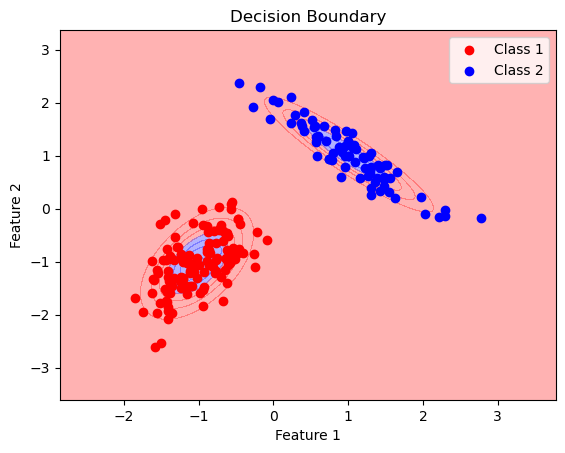

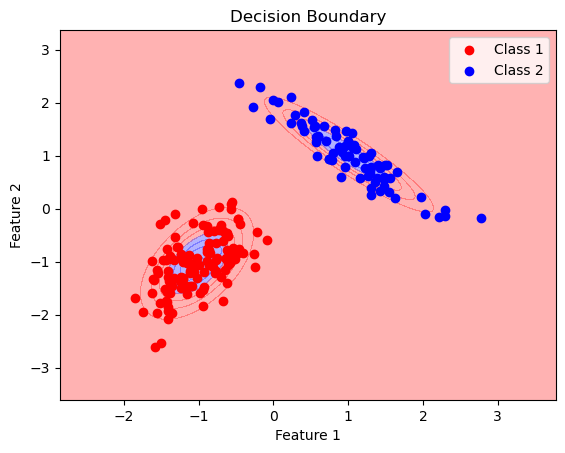

In [119]:
############################################################################
#Run the expectation and maximzation algorithm to estimate the parameters
############################################################################
data = data_full #data to run EM-algorithm
labels = labels_full #labels
N = 200 #number of input examples
D = 2 #data dimension
M = 2 #no.of components in GMM

pi = [0.5, 0.5] #Initialize the prior probabilities
mu = np.array([[1,1], [-1,-1]]) #Initialize the mean vectors
sigma = np.array([[[0.5, 0.25],[0.25, 0.5]], [[0.5, 0.25],[0.25, 0.5]]]) #Initialize the covariance matrices


nsteps = 5  #Number of steps to run EM algorithm
for index in range(0,nsteps,1):

  #Compute the likelihood
  ll = likelihood(data, pi, mu, sigma, log_likelihood=True)

  #Plot the contours
  plot_contours(data, labels, pi, mu, sigma)

  #Expectation step
  gamma = expectation(data, pi, mu, sigma)

  #Maximization step
  pi, mu, sigma = maximization(data, gamma)

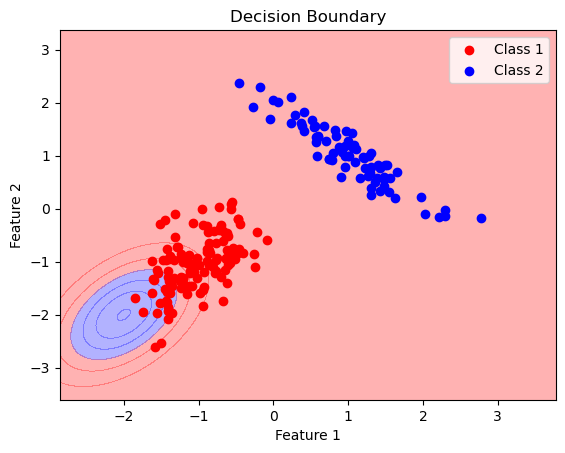

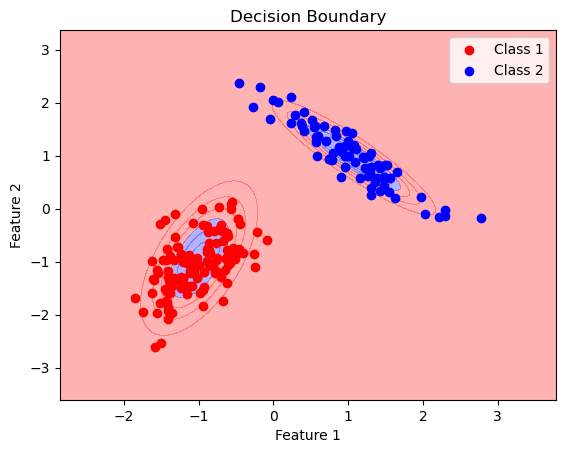

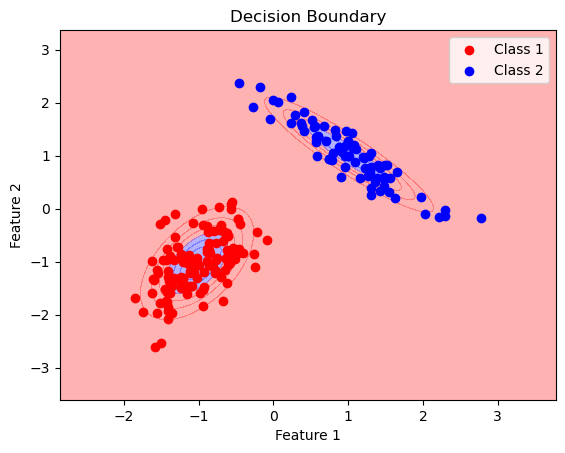

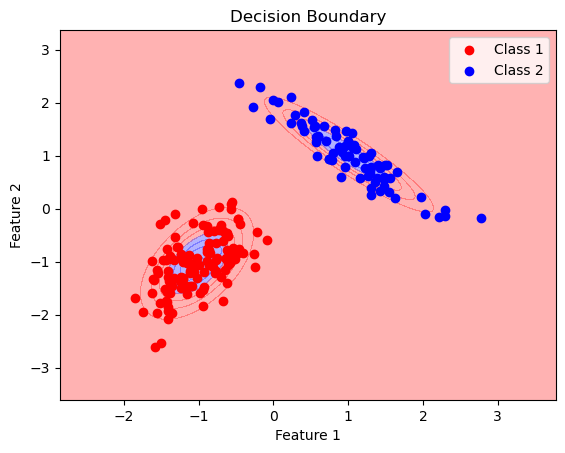

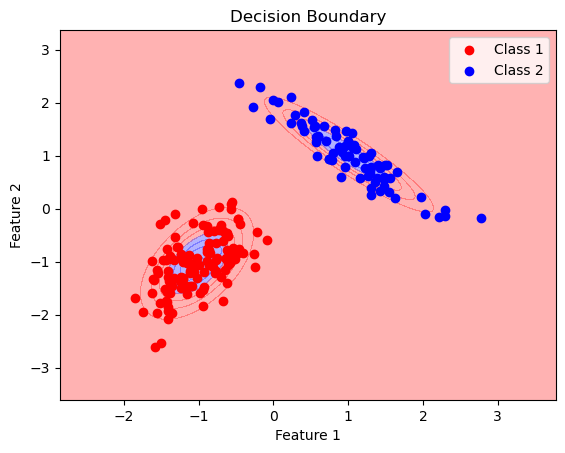

In [120]:
############################################################################
##Part-6)-d: Understand the issues with EM algorithm
############################################################################

# Influence of initialization

pi = [0.1, 0.9] #Initialize the prior probabilities
mu = np.array([[2,2], [-2,-2]]) #Initialize the mean vectors
sigma = np.array([[[0.15, 0.15],[0, 0.5]], [[0.35, 0.15],[0.25, 0.5]]]) #Initialize the covariance matrices

nsteps = 5  #Number of steps to run EM algorithm
for index in range(0,nsteps,1):

  #Compute the likelihood
  ll = likelihood(data, pi, mu, sigma, log_likelihood=True)

  #Plot the contours
  plot_contours(data, labels, pi, mu, sigma)

  #Expectation step
  gamma = expectation(data, pi, mu, sigma)

  #Maximization step
  pi, mu, sigma = maximization(data, gamma)

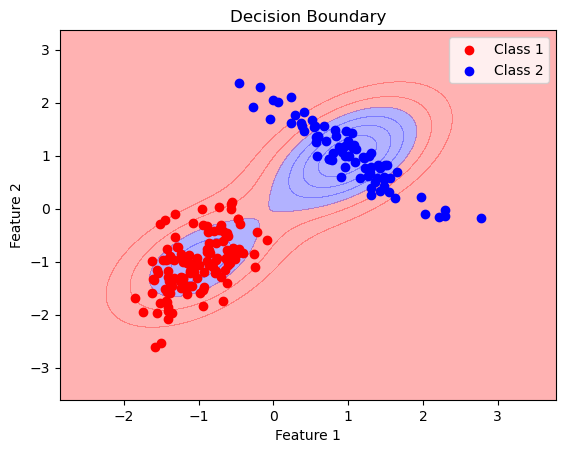

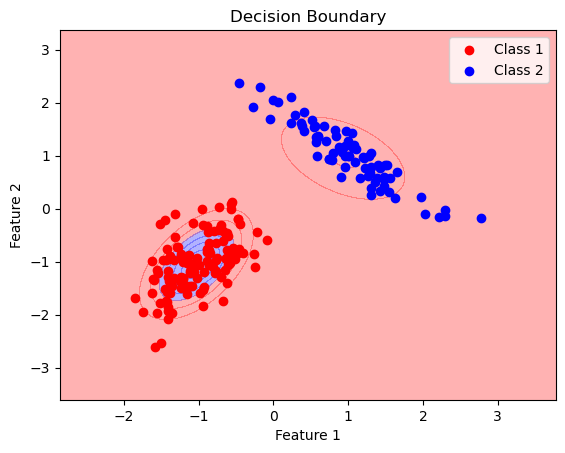

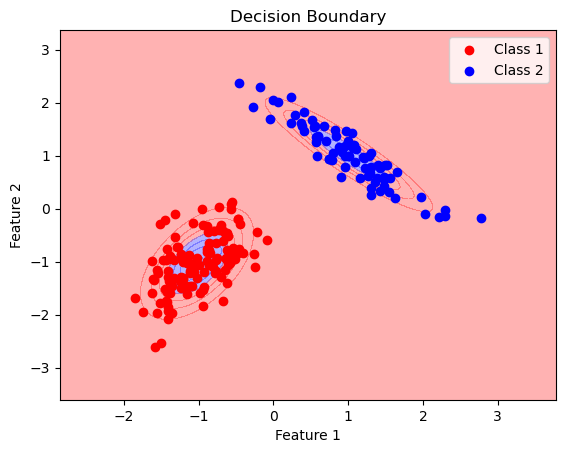

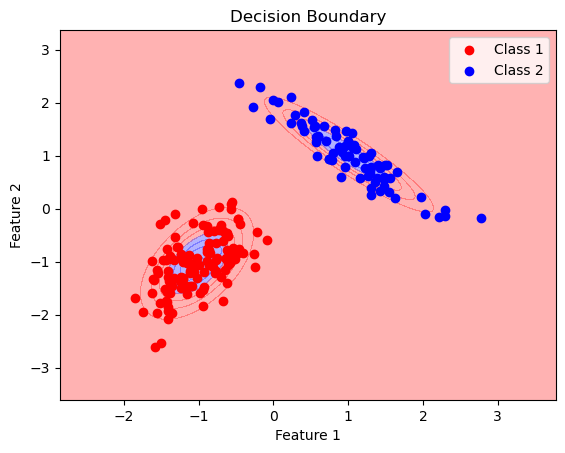

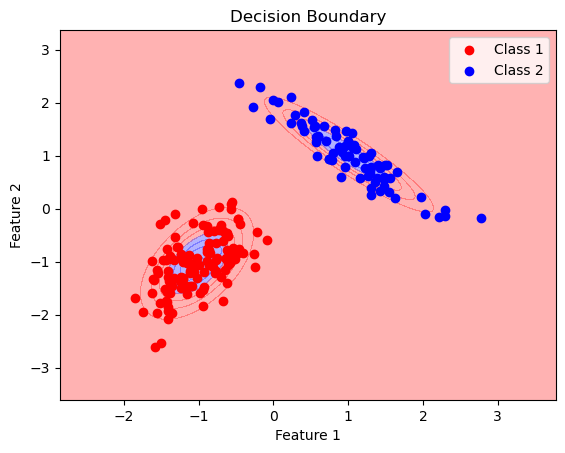

In [121]:
# Influence of covariance matrix

# Case 1: Full covariance matrix

data = data_full #data to run EM-algorithm
labels = labels_full #labels

pi = [0.6, 0.4] #Initialize the prior probabilities
mu = np.array([[1,1], [-1,-1]]) #Initialize the mean vectors
sigma = np.array([[[0.5, 0.25],[0.25, 0.5]], [[0.5, 0.25],[0.25, 0.5]]]) #Initialize the covariance matrices
nsteps = 5  #Number of steps to run EM algorithm

for index in range(0,nsteps,1):
    #Compute the likelihood
    ll = likelihood(data, pi, mu, sigma, log_likelihood=True)

    #Plot the contours
    plot_contours(data, labels, pi, mu, sigma)

    #Expectation step
    gamma = expectation(data, pi, mu, sigma)

    #Maximization step
    pi, mu, sigma = maximization(data, gamma)

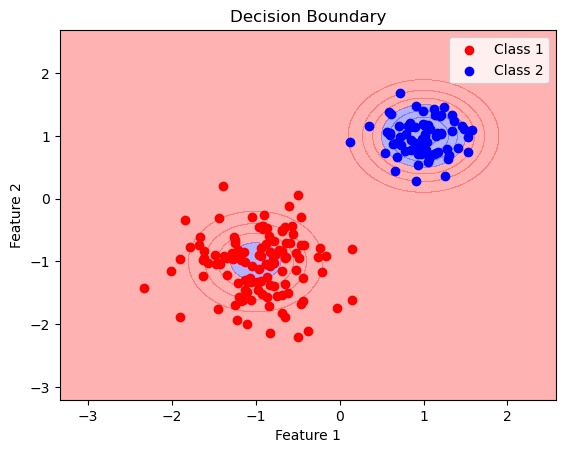

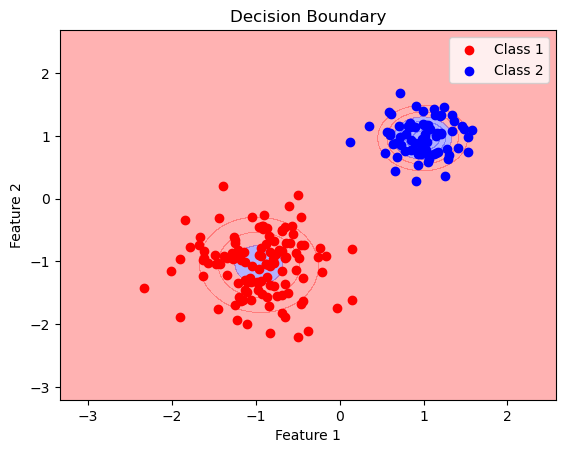

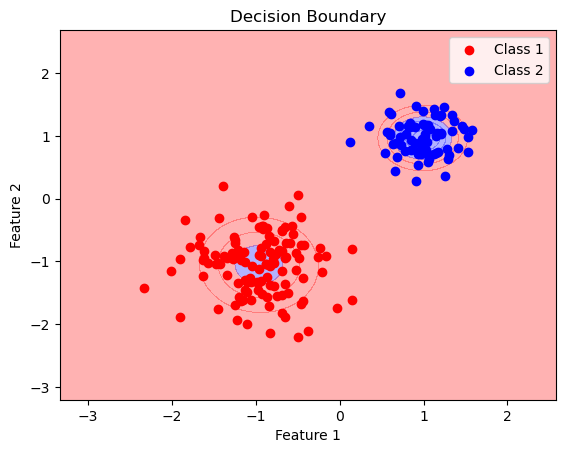

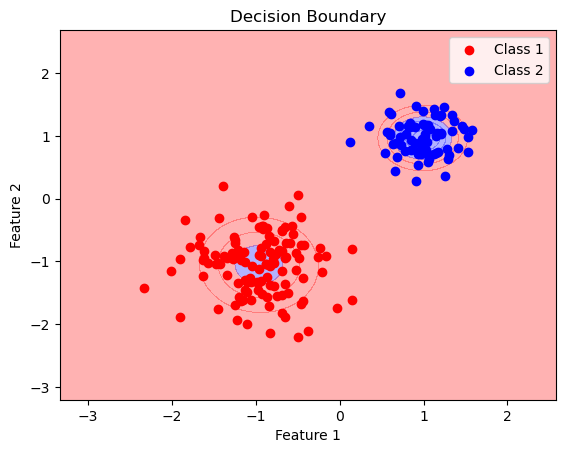

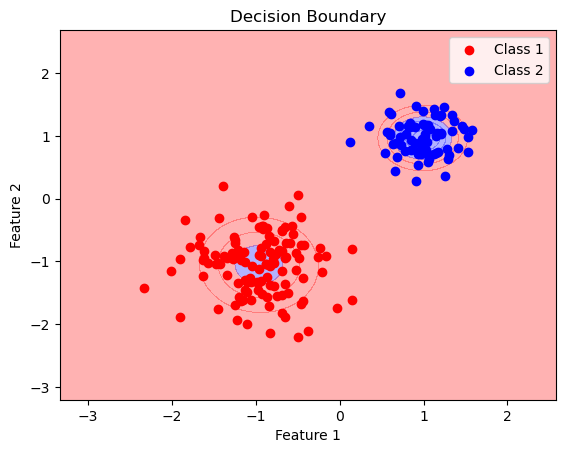

In [122]:
# Case 2: Spherical covariance matrix

data = data_sp #data to run EM-algorithm
labels = labels_sp #labels

pi = [0.6, 0.4] #Initialize the prior probabilities
mu = np.array([[1,1], [-1,-1]]) #Initialize the mean vectors
sigma = np.array([[[0.2, 0],[0, 0.2]], [[0.2, 0],[0, 0.2]]]) #Initialize the covariance matrices
nsteps = 5  #Number of steps to run EM algorithm

for index in range(0,nsteps,1):
    #Compute the likelihood
    ll = likelihood(data, pi, mu, sigma, log_likelihood=True)

    #Plot the contours
    plot_contours(data, labels, pi, mu, sigma)

    #Expectation step
    gamma = expectation(data, pi, mu, sigma)

    #Maximization step
    pi, mu, sigma = maximization(data, gamma)

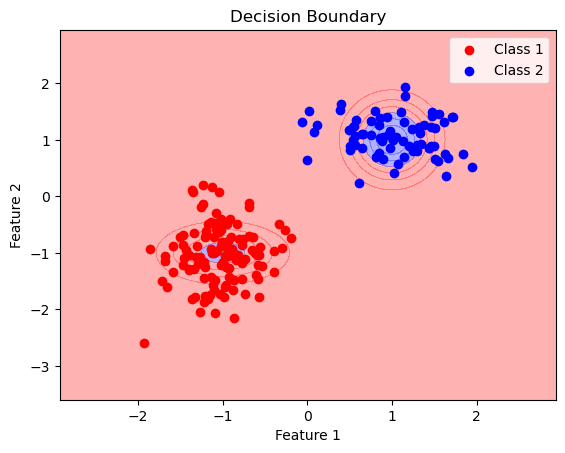

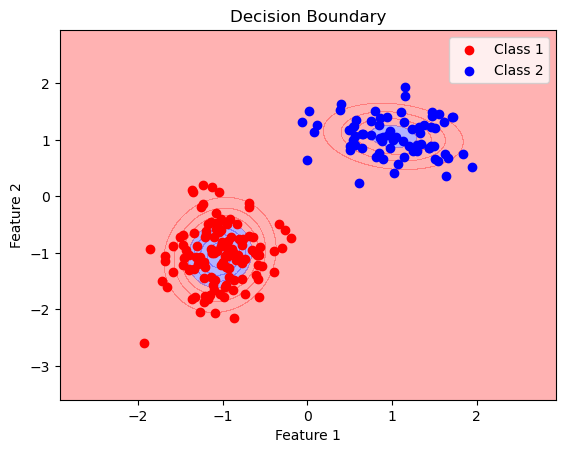

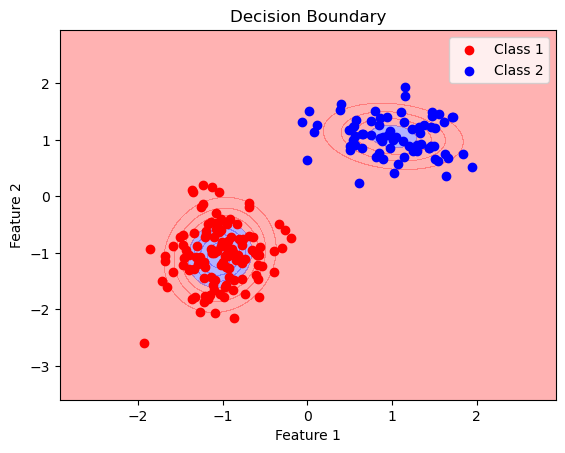

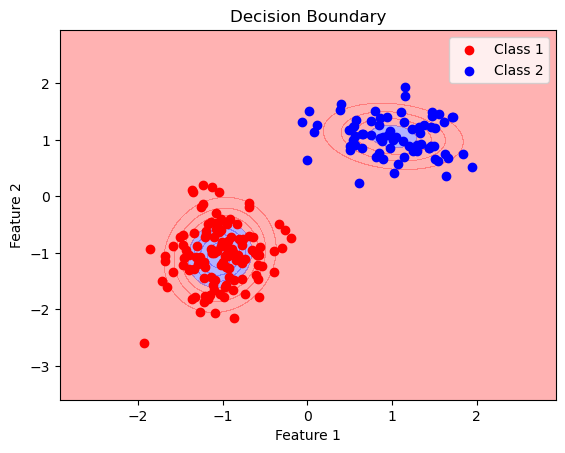

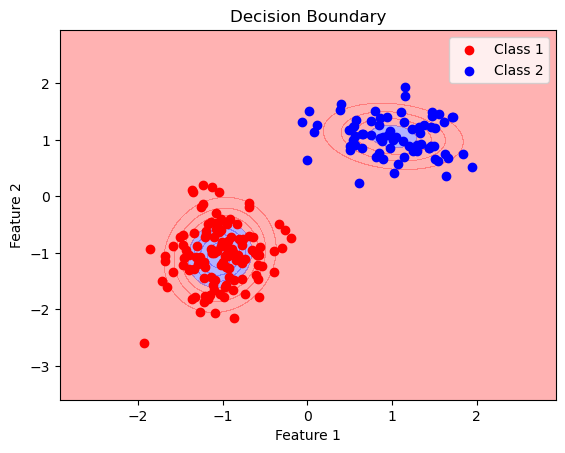

In [123]:
# Case 3: Diagonal covariance matrix

data = data_dg #data to run EM-algorithm
labels = labels_dg #labels

pi = [0.6, 0.4] #Initialize the prior probabilities
mu = np.array([[1,1], [-1,-1]]) #Initialize the mean vectors
sigma = np.array([[[0.1, 0],[0, 0.2]], [[0.2, 0],[0, 0.1]]]) #Initialize the covariance matrices
nsteps = 5  #Number of steps to run EM algorithm

for index in range(0,nsteps,1):
    #Compute the likelihood
    ll = likelihood(data, pi, mu, sigma, log_likelihood=True)

    #Plot the contours
    plot_contours(data, labels, pi, mu, sigma)

    #Expectation step
    gamma = expectation(data, pi, mu, sigma)

    #Maximization step
    pi, mu, sigma = maximization(data, gamma)

<b> Report your observations </b>

1. Even though the EM algorithm is initialized with different initial values, it converged to similar values of the parameters.

2. For different covariance matrices, the EM algorithm converged to proper values of the parameters.